In [1]:
import stockPred

from stockPred import MinMaxScaler, StandardScaler, RobustScaler, loadData, add_targets_and_indicators, calculate_data_balance, calculate_common_sense_baseline, prepare_data_to_train, RNNModel, create_models_archive, evaluate_models_archive, HP_RNNModel, Hyperband

## Different data intervals 

In [2]:
# initialize a MinMaxScaler instance for a range between 0 and 1
min_max_scaler = MinMaxScaler(feature_range=(0, 1))

# initialize a StandardScaler instance
standard_scaler = StandardScaler()

# initialize a RobustScaler instance
robust_scaler = RobustScaler()

### 1 Day interval SimpleRNN

In [3]:
# insert the stock symbols into a list
symbols_list = ['PFE', 'ROP', 'XYL', 'CPAY', 'INCY']

# load the stock data for the 5 companies into a dictionary
dfs_1d = loadData(symbols=symbols_list, period='max', interval='1d')

# add the targets and technical indicators to each dataframe in the dictionary
full_dfs_1d = add_targets_and_indicators(dfs_1d.copy())

# get the trend up ratio of all the dataframes in the dictionary to get a sense of how balanced the data is
calculate_data_balance(full_dfs_1d)

# get the common sense baseline for each dataframe in the dictionary
calculate_common_sense_baseline(full_dfs_1d)

# apply the 3 steps of preparing data for training on each dataframe in the dictionary
target = 'classification' # set the target
timesteps = 10 # set the timesteps
data_sets_1d = prepare_data_to_train(full_dfs_1d.copy(), 
                                     min_max_scaler, 
                                     target, 
                                     timesteps)

# set the model initialization inputs
X_train_shape = data_sets_1d['PFE']['X_train'].shape
model_type='classification'
tuner = None
layer_type='SimpleRNN'

# create the model
simpleRNN_model_1d = RNNModel(X_train_shape, model_type, layer_type)
simpleRNN_model_1d = simpleRNN_model_1d.build()


# create models archive for simpleRNN classification approach
simpleRNN_models_archive_1d = create_models_archive(simpleRNN_model_1d, 
                                                 data_sets_1d, 
                                                 _model_type=model_type, 
                                                 _tuner=tuner, 
                                                 _epochs=300, 
                                                 _model_name='simpleRNN_model_1d', 
                                                 _project_name='simpleRNN_models_archive_1d')

Data loaded from directory
The Trend up ratio of PFE is 0.49853935397713045 for 11981 rows
The Trend up ratio of ROP is 0.5233549700903652 for 7857 rows
The Trend up ratio of XYL is 0.52059100911663 for 3181 rows
The Trend up ratio of CPAY is 0.5344320188346086 for 3398 rows
The Trend up ratio of INCY is 0.492940863079382 for 7508 rows
The Average Trend up ratio is: 0.5139716430196233
The common sense score of PFE is: 0.5008763876137218
The common sense score of ROP is: 0.49077255950108184
The common sense score of XYL is: 0.49324111914492297
The common sense score of CPAY is: 0.49028840494408477
The common sense score of INCY is: 0.5077250932338838
The Average common sense score is: 0.496580712887539
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
training for the PFE model was done in: 0:03:05.788274
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
training for the ROP model was done in: 0:03:20.352763
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
training for the XYL model was done in: 0:03:24.640065
21/21 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 10, 64)              │           8,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,464 (201.04 KB)

 Trainable params: 17,154 (67.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 34,310 (134.03 KB)

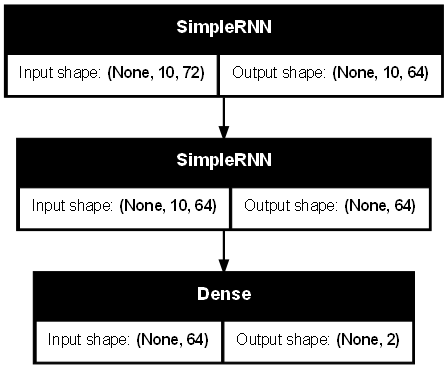

The PFE Model Classification Metrics for test set:
Accuracy: 0.5018852115626309
Precision: 0.5019435460294
Recall: 0.5018852115626309
F-Score: 0.5019072451341932
--------------------------------------------------------------


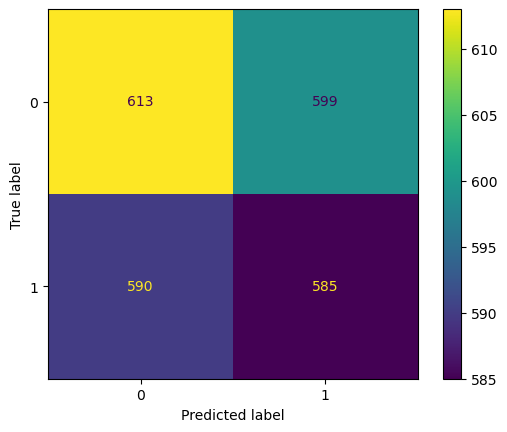

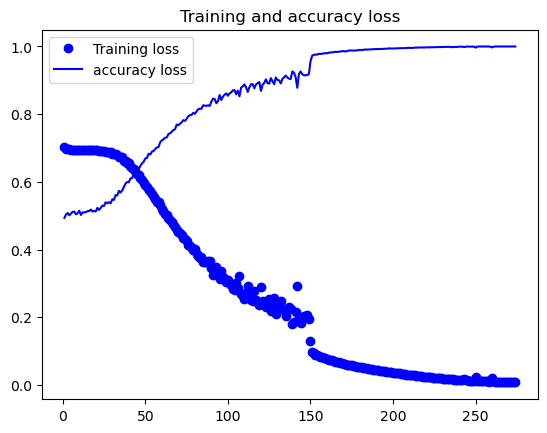

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 10, 64)              │           8,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,464 (201.04 KB)

 Trainable params: 17,154 (67.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 34,310 (134.03 KB)

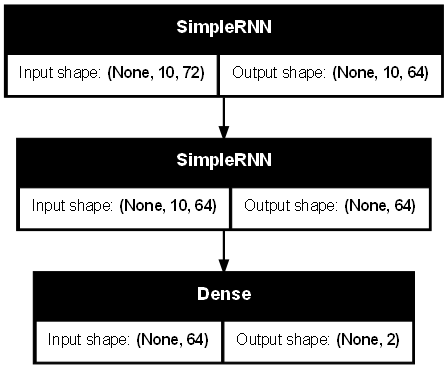

The ROP Model Classification Metrics for test set:
Accuracy: 0.5128040973111395
Precision: 0.5155475078089669
Recall: 0.5128040973111395
F-Score: 0.5135412863046983
--------------------------------------------------------------


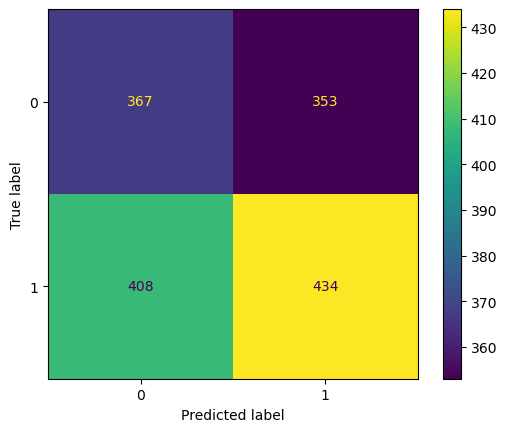

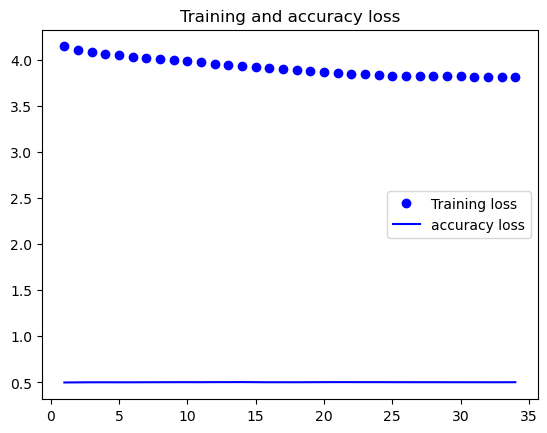

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 10, 64)              │           8,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,464 (201.04 KB)

 Trainable params: 17,154 (67.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 34,310 (134.03 KB)

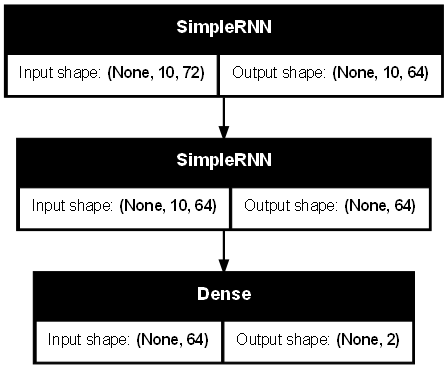

The XYL Model Classification Metrics for test set:
Accuracy: 0.46570972886762363
Precision: 0.47006804915199996
Recall: 0.46570972886762363
F-Score: 0.4640033528791353
--------------------------------------------------------------


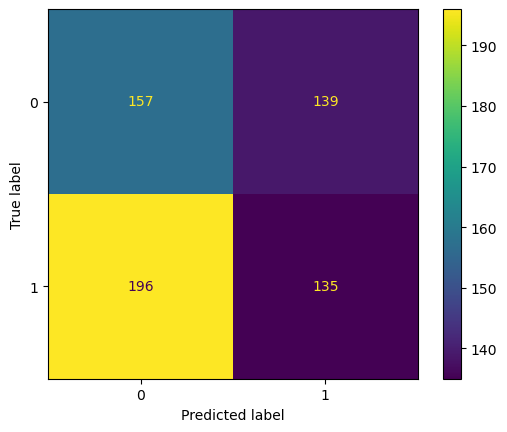

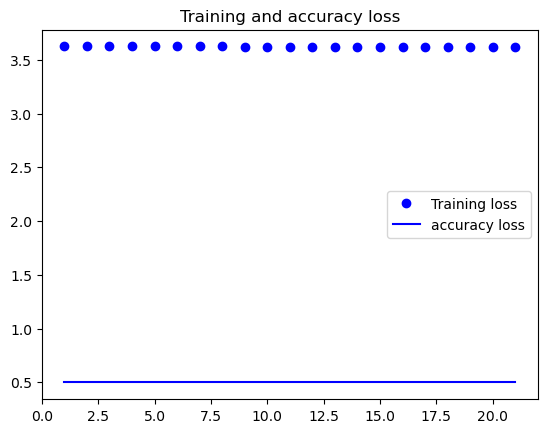

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 10, 64)              │           8,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,464 (201.04 KB)

 Trainable params: 17,154 (67.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 34,310 (134.03 KB)

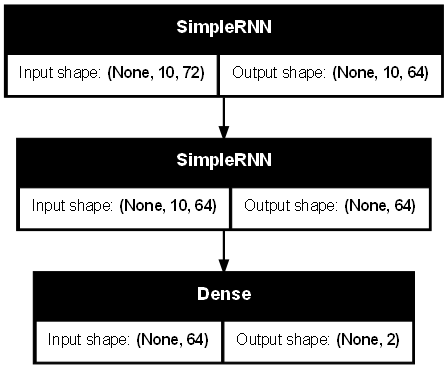

The CPAY Model Classification Metrics for test set:
Accuracy: 0.5
Precision: 0.5061666472606114
Recall: 0.5
F-Score: 0.5001704199905991
--------------------------------------------------------------


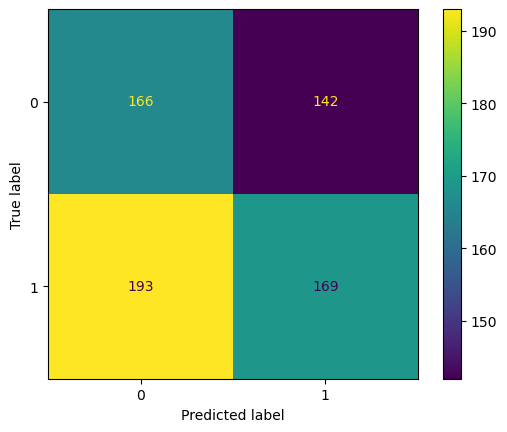

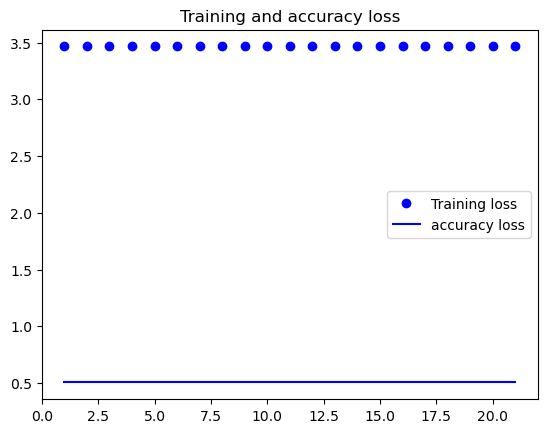

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 10, 64)              │           8,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,464 (201.04 KB)

 Trainable params: 17,154 (67.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 34,310 (134.03 KB)

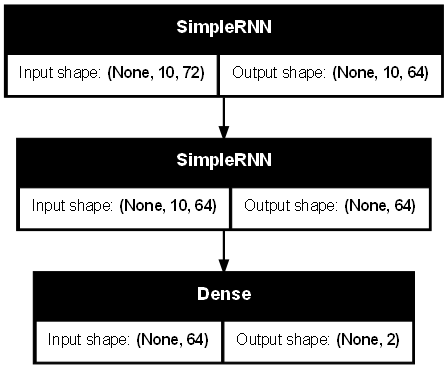

The INCY Model Classification Metrics for test set:
Accuracy: 0.5221179624664879
Precision: 0.5223926542436738
Recall: 0.5221179624664879
F-Score: 0.5222156937302234
--------------------------------------------------------------


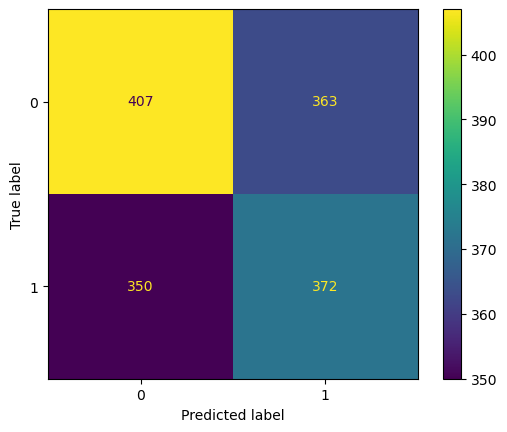

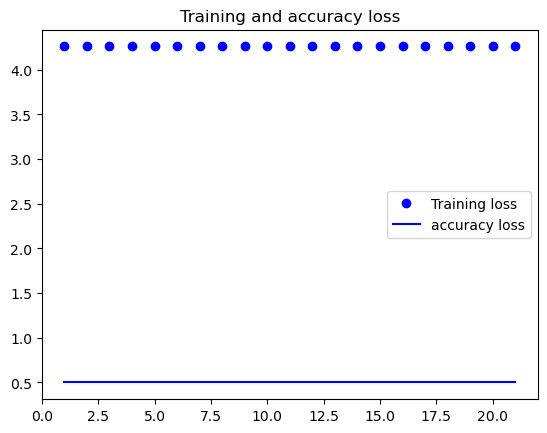

Average Classification Metrics for All Models on test set:
Average Accuracy: 0.5005034000415763
Average Precision: 0.5032236808989304
Average Recall: 0.5005034000415763
Average F-Score: 0.5003675996077698


In [4]:
# evaluate the models in the archive
evaluate_models_archive(simpleRNN_models_archive_1d)

### 1 Day interval LSTM

In [5]:
# insert the stock symbols into a list
symbols_list = ['PFE', 'ROP', 'XYL', 'CPAY', 'INCY']

# load the stock data for the 5 companies into a dictionary
dfs_1d = loadData(symbols=symbols_list, period='max', interval='1d')

# add the targets and technical indicators to each dataframe in the dictionary
full_dfs_1d = add_targets_and_indicators(dfs_1d.copy())

# get the trend up ratio of all the dataframes in the dictionary to get a sense of how balanced the data is
calculate_data_balance(full_dfs_1d)

# get the common sense baseline for each dataframe in the dictionary
calculate_common_sense_baseline(full_dfs_1d)

# apply the 3 steps of preparing data for training on each dataframe in the dictionary
target = 'classification' # set the target
timesteps = 10 # set the timesteps
data_sets_1d = prepare_data_to_train(full_dfs_1d.copy(), min_max_scaler, target, timesteps)

# set the model initialization inputs
X_train_shape = data_sets_1d['PFE']['X_train'].shape
model_type='classification'
tuner = None
layer_type='LSTM'

# create the model
lstm_model_1d = RNNModel(X_train_shape, model_type, layer_type)
lstm_model_1d = lstm_model_1d.build()


# create models archive for simpleRNN classification approach
lstm_models_archive_1d = create_models_archive(lstm_model_1d, 
                                                 data_sets_1d, 
                                                 _model_type=model_type, 
                                                 _tuner=tuner, 
                                                 _epochs=300, 
                                                 _model_name='lstm_model_1d', 
                                                 _project_name='lstm_models_archive_1d')

Data loaded from directory
The Trend up ratio of PFE is 0.49853935397713045 for 11981 rows
The Trend up ratio of ROP is 0.5233549700903652 for 7857 rows
The Trend up ratio of XYL is 0.52059100911663 for 3181 rows
The Trend up ratio of CPAY is 0.5344320188346086 for 3398 rows
The Trend up ratio of INCY is 0.492940863079382 for 7508 rows
The Average Trend up ratio is: 0.5139716430196233
The common sense score of PFE is: 0.5008763876137218
The common sense score of ROP is: 0.49077255950108184
The common sense score of XYL is: 0.49324111914492297
The common sense score of CPAY is: 0.49028840494408477
The common sense score of INCY is: 0.5077250932338838
The Average common sense score is: 0.496580712887539
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
training for the PFE model was done in: 0:04:08.909340
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
training for the ROP model was done in: 0:08:32.638397
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
training for the XYL model was done in: 0:13:55.361580
21/21 ━

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 64)              │          35,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 204,680 (799.54 KB)

 Trainable params: 68,226 (266.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 136,454 (533.03 KB)

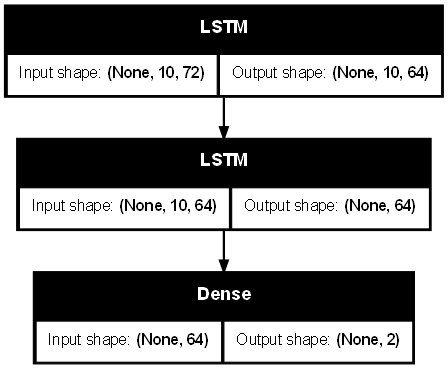

The PFE Model Classification Metrics for test set:
Accuracy: 0.5023041474654378
Precision: 0.5018698042203157
Recall: 0.5023041474654378
F-Score: 0.5016792646876836
--------------------------------------------------------------


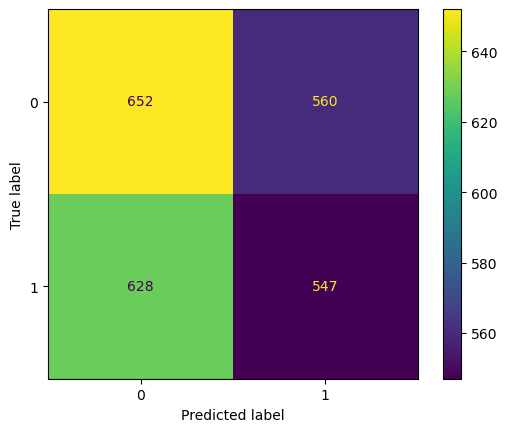

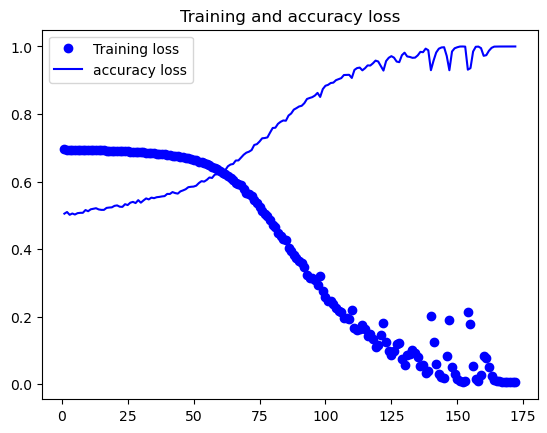

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 64)              │          35,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 204,680 (799.54 KB)

 Trainable params: 68,226 (266.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 136,454 (533.03 KB)

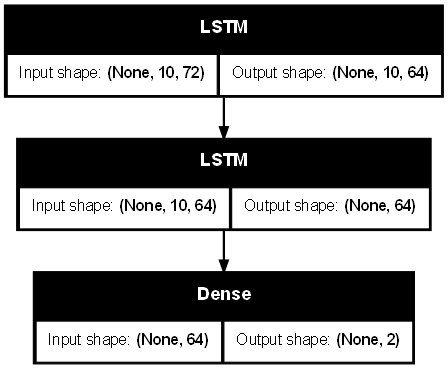

The ROP Model Classification Metrics for test set:
Accuracy: 0.499359795134443
Precision: 0.5159655873528148
Recall: 0.499359795134443
F-Score: 0.48805535709289705
--------------------------------------------------------------


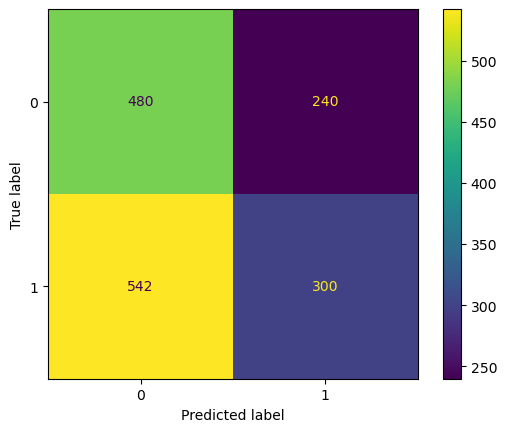

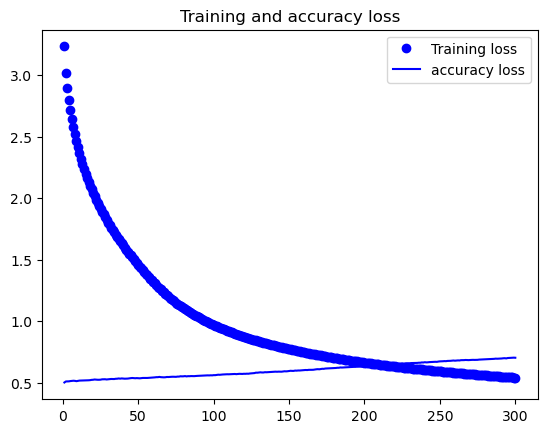

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 64)              │          35,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 204,680 (799.54 KB)

 Trainable params: 68,226 (266.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 136,454 (533.03 KB)

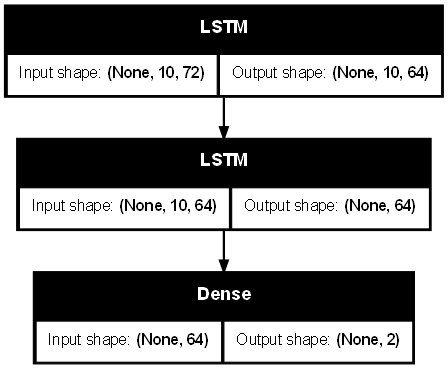

The XYL Model Classification Metrics for test set:
Accuracy: 0.4609250398724083
Precision: 0.46592619247081496
Recall: 0.4609250398724083
F-Score: 0.45725928611046246
--------------------------------------------------------------


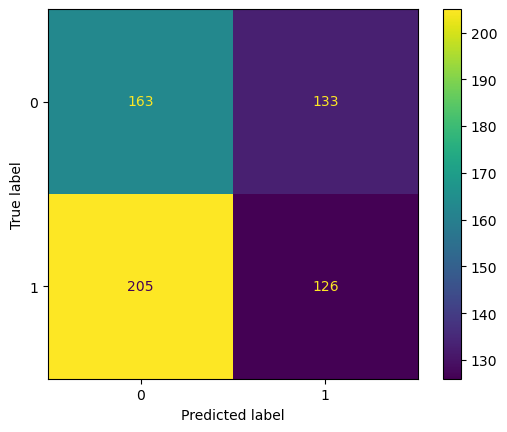

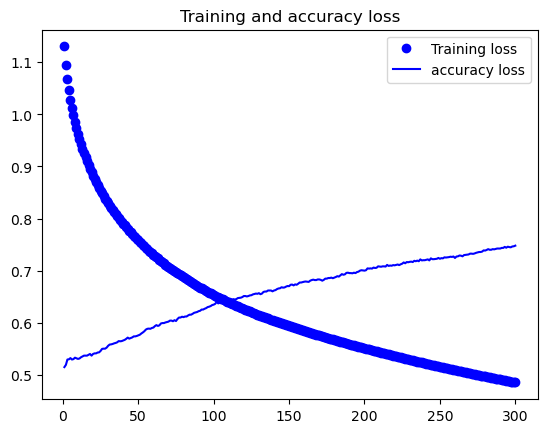

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 64)              │          35,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 204,680 (799.54 KB)

 Trainable params: 68,226 (266.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 136,454 (533.03 KB)

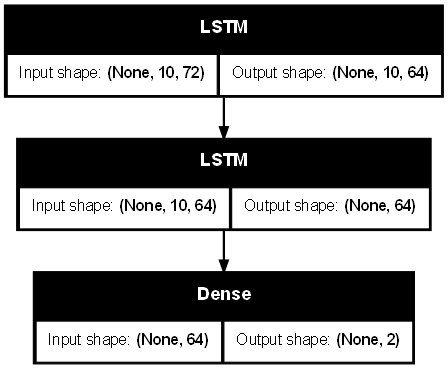

The CPAY Model Classification Metrics for test set:
Accuracy: 0.4626865671641791
Precision: 0.46049703645287376
Recall: 0.4626865671641791
F-Score: 0.46133118192819683
--------------------------------------------------------------


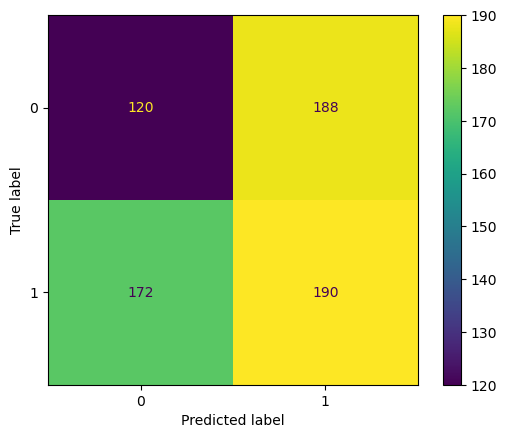

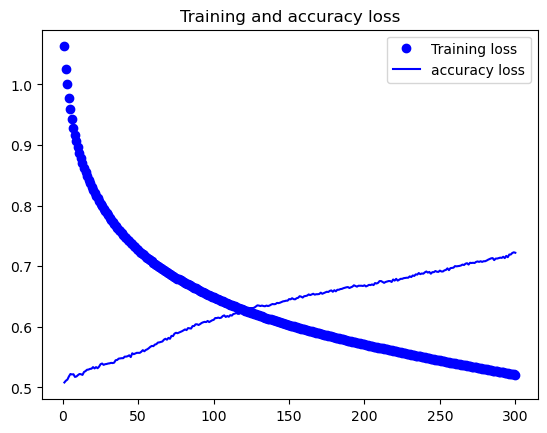

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 64)              │          35,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 204,680 (799.54 KB)

 Trainable params: 68,226 (266.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 136,454 (533.03 KB)

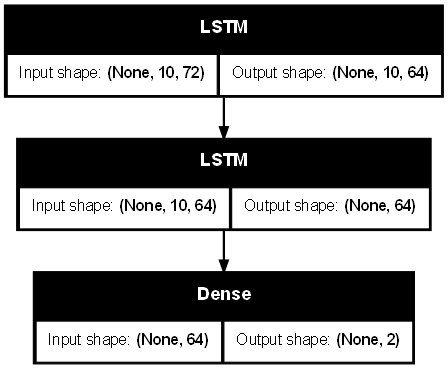

The INCY Model Classification Metrics for test set:
Accuracy: 0.48726541554959785
Precision: 0.48868736669989876
Recall: 0.48726541554959785
F-Score: 0.48693159782176676
--------------------------------------------------------------


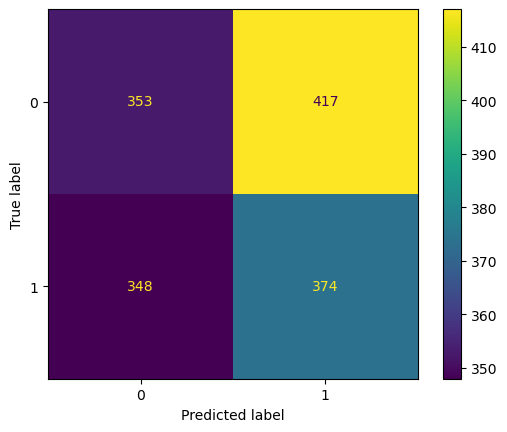

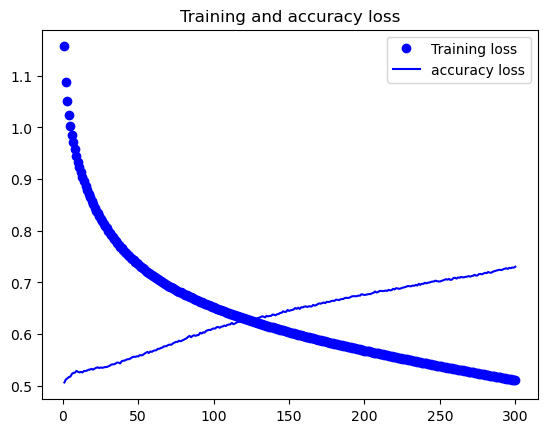

Average Classification Metrics for All Models on test set:
Average Accuracy: 0.4825081930372132
Average Precision: 0.48658919743934365
Average Recall: 0.4825081930372132
Average F-Score: 0.4790513375282014


In [6]:
# evaluate the models in the archive
evaluate_models_archive(lstm_models_archive_1d)

### 1 Day interval GRU

In [7]:
# insert the stock symbols into a list
symbols_list = ['PFE', 'ROP', 'XYL', 'CPAY', 'INCY']

# load the stock data for the 5 companies into a dictionary
dfs_1d = loadData(symbols=symbols_list, period='max', interval='1d')

# add the targets and technical indicators to each dataframe in the dictionary
full_dfs_1d = add_targets_and_indicators(dfs_1d.copy())

# get the trend up ratio of all the dataframes in the dictionary to get a sense of how balanced the data is
calculate_data_balance(full_dfs_1d)

# get the common sense baseline for each dataframe in the dictionary
calculate_common_sense_baseline(full_dfs_1d)

# apply the 3 steps of preparing data for training on each dataframe in the dictionary
target = 'classification' # set the target
timesteps = 10 # set the timesteps
data_sets_1d = prepare_data_to_train(full_dfs_1d.copy(), min_max_scaler, target, timesteps)

# set the model initialization inputs
X_train_shape = data_sets_1d['PFE']['X_train'].shape
model_type='classification'
tuner = None
layer_type='GRU'

# create the model
gru_model_1d = RNNModel(X_train_shape, model_type, layer_type)
gru_model_1d = gru_model_1d.build()


# create models archive for simpleRNN classification approach
gru_models_archive_1d = create_models_archive(gru_model_1d, 
                                                 data_sets_1d, 
                                                 _model_type=model_type, 
                                                 _tuner=tuner, 
                                                 _epochs=50, 
                                                 _model_name='gru_model_1d', 
                                                 _project_name='gru_models_archive_1d')

Data loaded from directory
The Trend up ratio of PFE is 0.49853935397713045 for 11981 rows
The Trend up ratio of ROP is 0.5233549700903652 for 7857 rows
The Trend up ratio of XYL is 0.52059100911663 for 3181 rows
The Trend up ratio of CPAY is 0.5344320188346086 for 3398 rows
The Trend up ratio of INCY is 0.492940863079382 for 7508 rows
The Average Trend up ratio is: 0.5139716430196233
The common sense score of PFE is: 0.5008763876137218
The common sense score of ROP is: 0.49077255950108184
The common sense score of XYL is: 0.49324111914492297
The common sense score of CPAY is: 0.49028840494408477
The common sense score of INCY is: 0.5077250932338838
The Average common sense score is: 0.496580712887539
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
training for the PFE model was done in: 0:01:47.330412
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
training for the ROP model was done in: 0:02:55.900514
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
training for the XYL model was done in: 0:03:24.810881
21/21 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 10, 64)              │          26,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 64)                  │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 154,760 (604.54 KB)

 Trainable params: 51,586 (201.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 103,174 (403.03 KB)

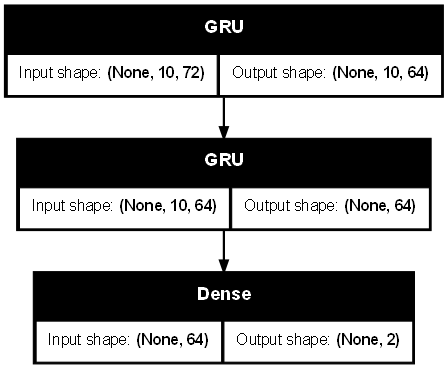

The PFE Model Classification Metrics for test set:
Accuracy: 0.5073313782991202
Precision: 0.5072804941855878
Recall: 0.5073313782991202
F-Score: 0.5073002391355952
--------------------------------------------------------------


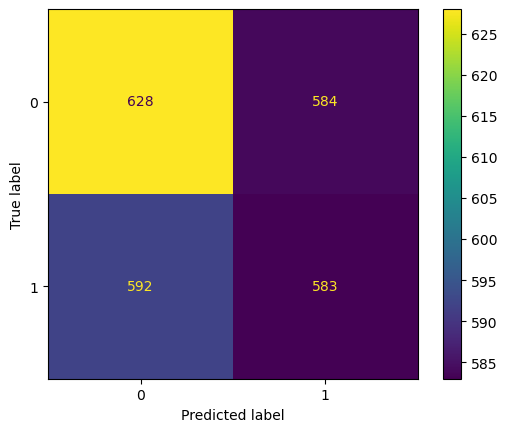

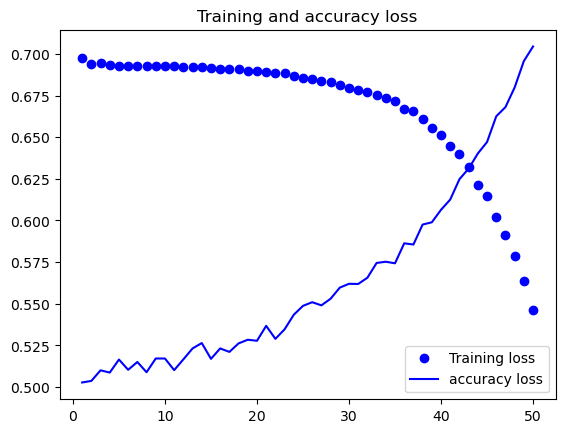

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 10, 64)              │          26,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 64)                  │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 154,760 (604.54 KB)

 Trainable params: 51,586 (201.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 103,174 (403.03 KB)

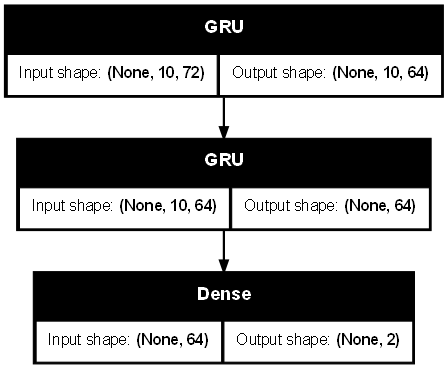

The ROP Model Classification Metrics for test set:
Accuracy: 0.5185659411011524
Precision: 0.5142275946066214
Recall: 0.5185659411011524
F-Score: 0.5146067582645507
--------------------------------------------------------------


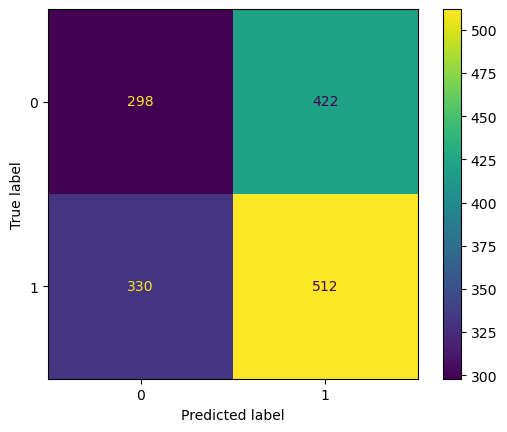

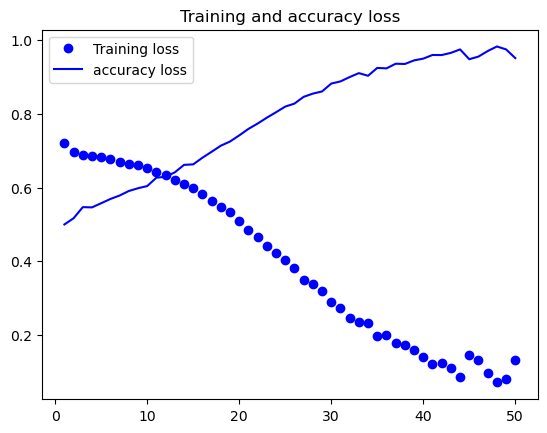

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 10, 64)              │          26,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 64)                  │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 154,760 (604.54 KB)

 Trainable params: 51,586 (201.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 103,174 (403.03 KB)

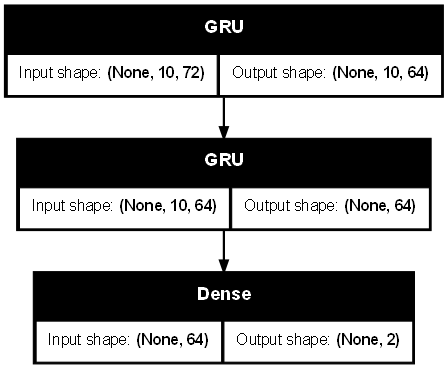

The XYL Model Classification Metrics for test set:
Accuracy: 0.5007974481658692
Precision: 0.5071404757937832
Recall: 0.5007974481658692
F-Score: 0.4978096679192633
--------------------------------------------------------------


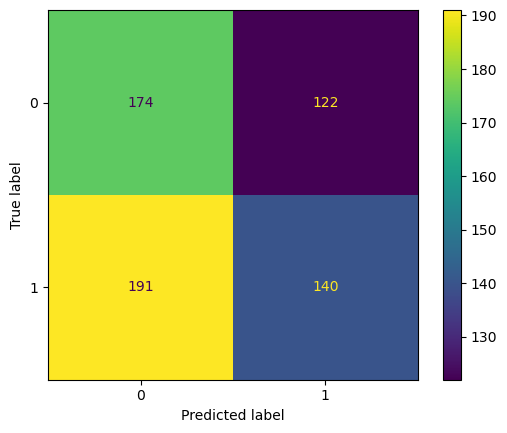

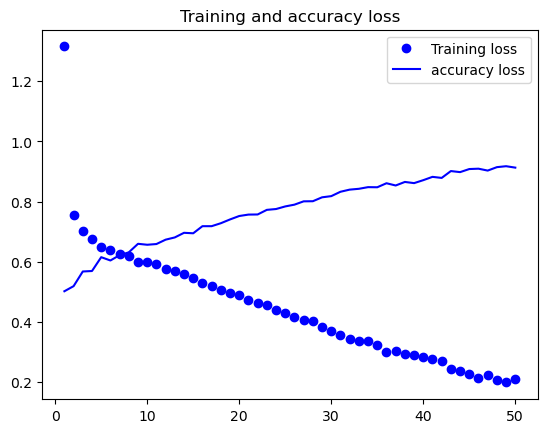

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 10, 64)              │          26,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 64)                  │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 154,760 (604.54 KB)

 Trainable params: 51,586 (201.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 103,174 (403.03 KB)

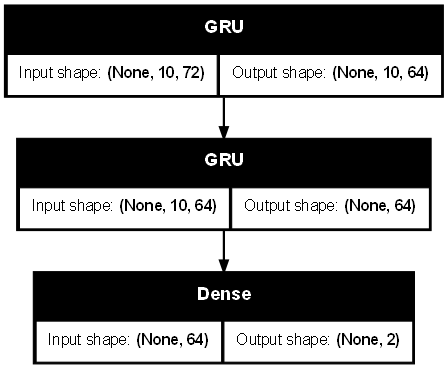

The CPAY Model Classification Metrics for test set:
Accuracy: 0.4925373134328358
Precision: 0.49001936217689906
Recall: 0.4925373134328358
F-Score: 0.4908435738605091
--------------------------------------------------------------


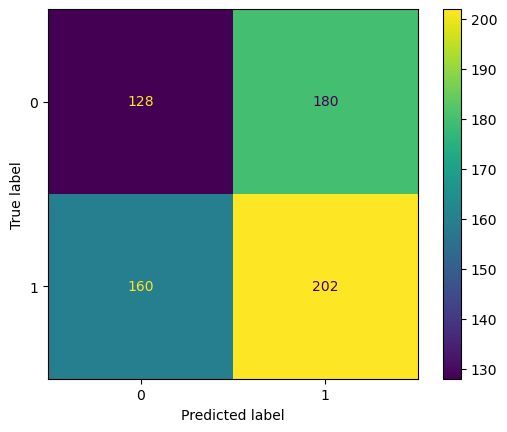

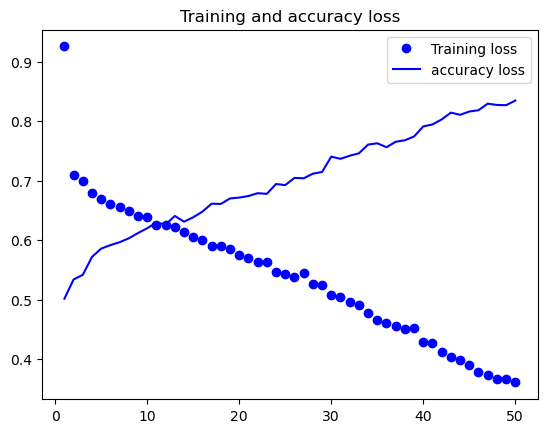

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 10, 64)              │          26,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 64)                  │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 154,760 (604.54 KB)

 Trainable params: 51,586 (201.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 103,174 (403.03 KB)

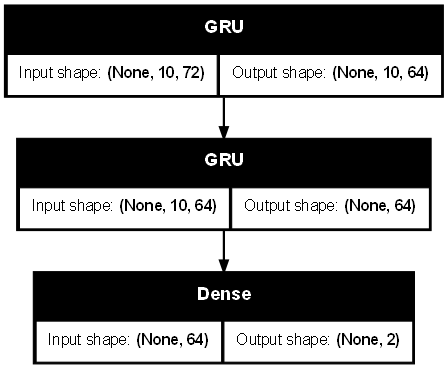

The INCY Model Classification Metrics for test set:
Accuracy: 0.4738605898123324
Precision: 0.47659014366230157
Recall: 0.4738605898123324
F-Score: 0.4483120862695646
--------------------------------------------------------------


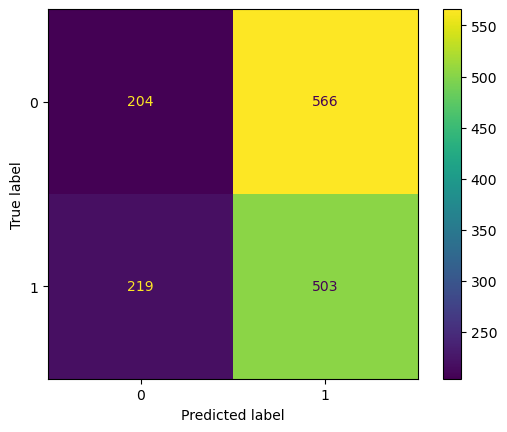

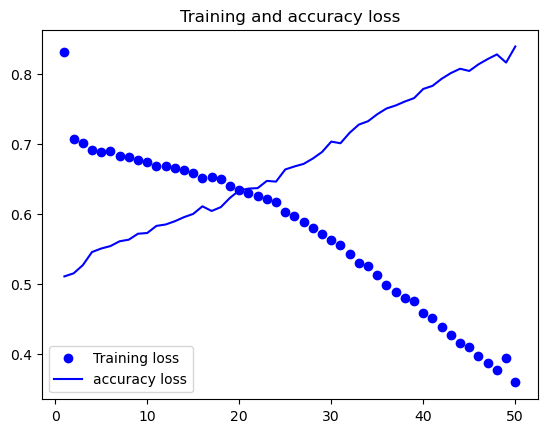

Average Classification Metrics for All Models on test set:
Average Accuracy: 0.498618534162262
Average Precision: 0.4990516140850386
Average Recall: 0.498618534162262
Average F-Score: 0.4917744650898966


In [8]:
# evaluate the models in the archive
evaluate_models_archive(gru_models_archive_1d)

### 1 Day interval LSTM with HP

In [9]:
# insert the stock symbols into a list
symbols_list = ['PFE', 'ROP', 'XYL', 'CPAY', 'INCY']

# load the stock data for the 5 companies into a dictionary
dfs_1d = loadData(symbols=symbols_list, period='max', interval='1d')

# add the targets and technical indicators to each dataframe in the dictionary
full_dfs_1d = add_targets_and_indicators(dfs_1d.copy())

# get the trend up ratio of all the dataframes in the dictionary to get a sense of how balanced the data is
calculate_data_balance(full_dfs_1d)

# get the common sense baseline for each dataframe in the dictionary
calculate_common_sense_baseline(full_dfs_1d)

# apply the 3 steps of preparing data for training on each dataframe in the dictionary
target = 'classification' # set the target
timesteps = 10 # set the timesteps
data_sets_1d = prepare_data_to_train(full_dfs_1d.copy(), min_max_scaler, target, timesteps)

# set the model initialization inputs
X_train_shape = data_sets_1d['PFE']['X_train'].shape
model_type='classification'
layer_type='LSTM'
tuner = Hyperband

# create the model
lstm_hp_model_1d = HP_RNNModel(X_train_shape, layer_type)


# create models archive for simpleRNN classification approach
lstm_hp_models_archive_1d = create_models_archive(lstm_hp_model_1d, 
                                                 data_sets_1d, 
                                                 _model_type=model_type, 
                                                 _tuner=tuner, 
                                                 _epochs=200, 
                                                 _model_name='lstm_hp_model_1d', 
                                                 _project_name='lstm_hp_models_archive_1d')

Data loaded from directory
The Trend up ratio of PFE is 0.49853935397713045 for 11981 rows
The Trend up ratio of ROP is 0.5233549700903652 for 7857 rows
The Trend up ratio of XYL is 0.52059100911663 for 3181 rows
The Trend up ratio of CPAY is 0.5344320188346086 for 3398 rows
The Trend up ratio of INCY is 0.492940863079382 for 7508 rows
The Average Trend up ratio is: 0.5139716430196233
The common sense score of PFE is: 0.5008763876137218
The common sense score of ROP is: 0.49077255950108184
The common sense score of XYL is: 0.49324111914492297
The common sense score of CPAY is: 0.49028840494408477
The common sense score of INCY is: 0.5077250932338838
The Average common sense score is: 0.496580712887539
Reloading Tuner from keras_tuner_models\lstm_hp_models_archive_1d/PFE\tuner0.json
Results summary
Results in keras_tuner_models\lstm_hp_models_archive_1d/PFE
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0012 summary
Hyperparameters:
hp_layers: 2
hp_units_a

49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
training for the ROP model was done in: 0:10:15.487598
Reloading Tuner from keras_tuner_models\lstm_hp_models_archive_1d/XYL\tuner0.json
Results summary
Results in keras_tuner_models\lstm_hp_models_archive_1d/XYL
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0002 summary
Hyperparameters:
hp_layers: 4
hp_units_at_hp_layer_0: 128
recurrent_dropout_0: 0.2
hp_units_at_hp_layer_1: 64
recurrent_dropout_1: 0.2
learning_rate: 0.0001272703380605649
hp_units_at_hp_layer_2: 128
recurrent_dropout_2: 0.4
hp_units_at_hp_layer_3: 128
recurrent_dropout_3: 0.0
batch_size: 64
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.5031446814537048

Trial 0014 summary
Hyperparameters:
hp_layers: 4
hp_units_at_hp_layer_0: 128
recurrent_dropout_0: 0.2
hp_units_at_hp_layer_1: 64
recurrent_dropout_1: 0.2
learning_rate: 0.0001272703380605649
hp_units_at_hp_layer_2: 128
recurrent_dropout_2: 0.4
hp_units_at_hp_layer_3

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
training for the CPAY model was done in: 0:14:17.439178
Reloading Tuner from keras_tuner_models\lstm_hp_models_archive_1d/INCY\tuner0.json
Results summary
Results in keras_tuner_models\lstm_hp_models_archive_1d/INCY
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0024 summary
Hyperparameters:
hp_layers: 2
hp_units_at_hp_layer_0: 64
recurrent_dropout_0: 0.30000000000000004
hp_units_at_hp_layer_1: 128
recurrent_dropout_1: 0.1
learning_rate: 0.0001290019762712144
hp_units_at_hp_layer_2: 64
recurrent_dropout_2: 0.1
hp_units_at_hp_layer_3: 128
recurrent_dropout_3: 0.0
batch_size: 32
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0020
Score: 0.5183210968971252

Trial 0020 summary
Hyperparameters:
hp_layers: 2
hp_units_at_hp_layer_0: 64
recurrent_dropout_0: 0.30000000000000004
hp_units_at_hp_layer_1: 128
recurrent_dropout_1: 0.1
learning_rate: 0.0001290019762712144
hp_units_at_hp_lay

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 10, 128)             │         102,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 457,352 (1.74 MB)

 Trainable params: 152,450 (595.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 304,902 (1.16 MB)

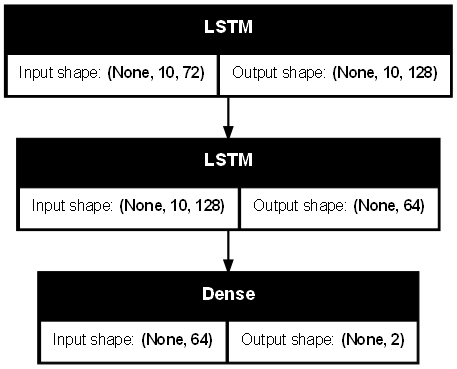

The PFE Model Classification Metrics for test set:
Accuracy: 0.48847926267281105
Precision: 0.48929937435513393
Recall: 0.48847926267281105
F-Score: 0.4869777815415426
--------------------------------------------------------------


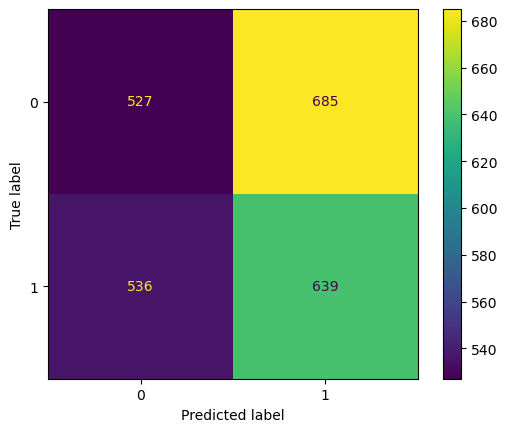

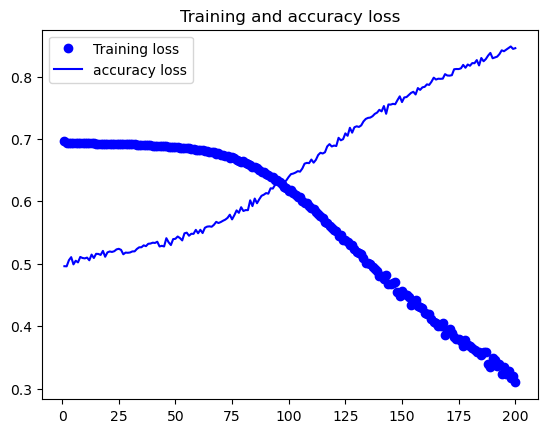

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 10, 64)              │          35,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 204,680 (799.54 KB)

 Trainable params: 68,226 (266.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 136,454 (533.03 KB)

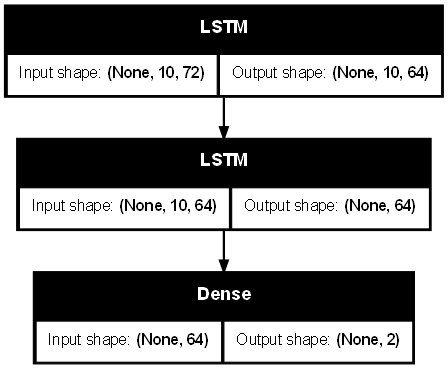

The ROP Model Classification Metrics for test set:
Accuracy: 0.5313700384122919
Precision: 0.4329500472831045
Recall: 0.5313700384122919
F-Score: 0.3849599565879954
--------------------------------------------------------------


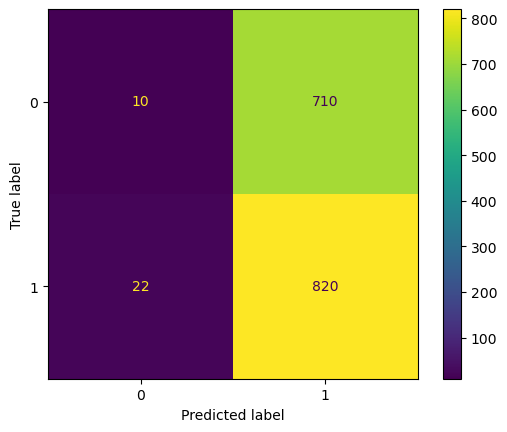

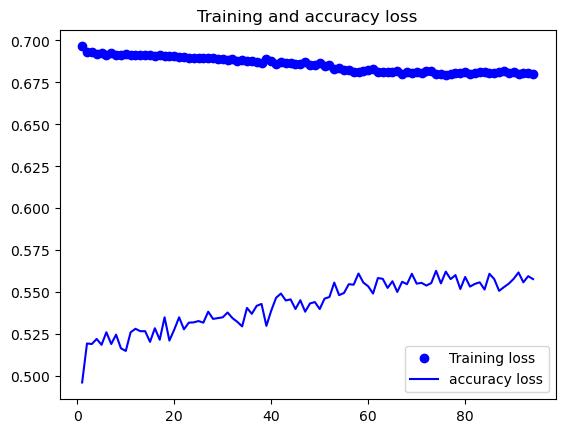

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 10, 128)             │         102,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 10, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 10, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,148,936 (4.38 MB)

 Trainable params: 382,978 (1.46 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 765,958 (2.92 MB)

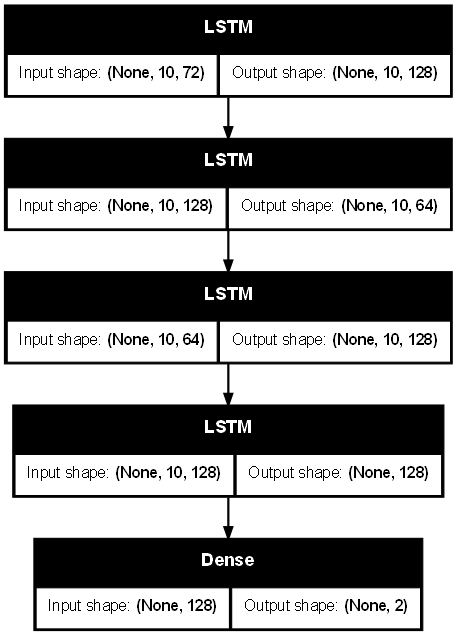

The XYL Model Classification Metrics for test set:
Accuracy: 0.4704944178628389
Precision: 0.4727444867595672
Recall: 0.4704944178628389
F-Score: 0.4708096574931643
--------------------------------------------------------------


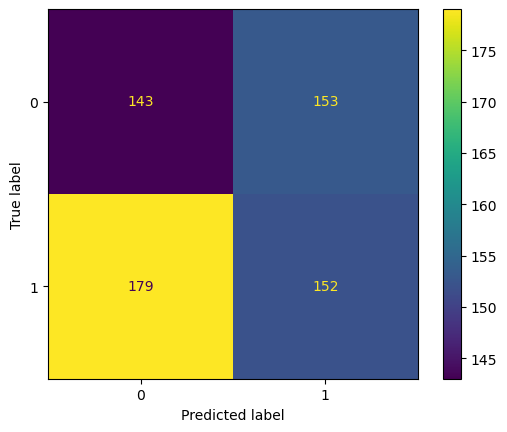

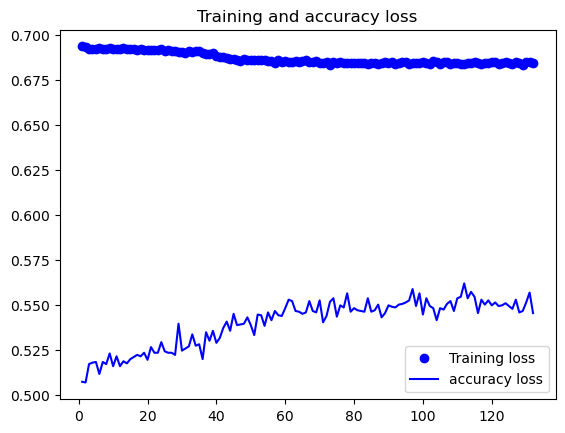

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                       │ (None, 10, 64)              │          35,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 402,440 (1.54 MB)

 Trainable params: 134,146 (524.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 268,294 (1.02 MB)

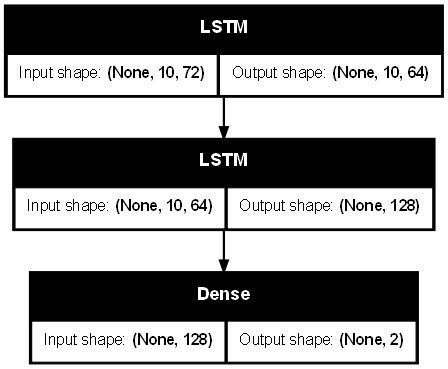

The CPAY Model Classification Metrics for test set:
Accuracy: 0.5149253731343284
Precision: 0.496473833733678
Recall: 0.5149253731343284
F-Score: 0.4824650704493959
--------------------------------------------------------------


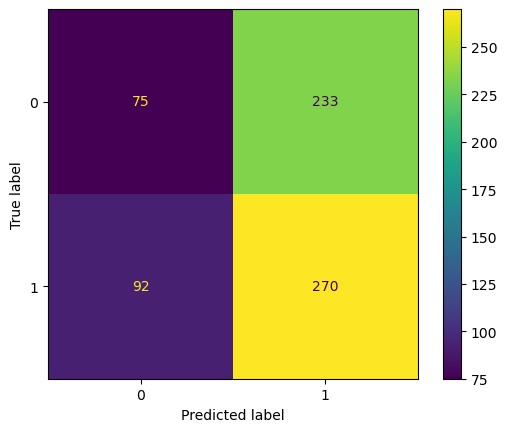

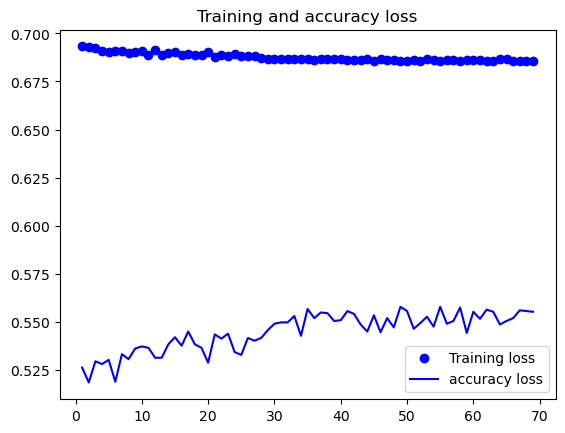

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 10, 64)              │          35,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 402,440 (1.54 MB)

 Trainable params: 134,146 (524.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 268,294 (1.02 MB)

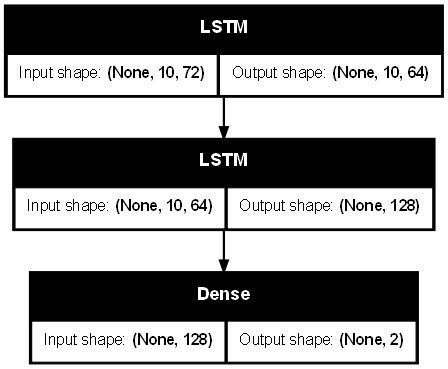

The INCY Model Classification Metrics for test set:
Accuracy: 0.4785522788203753
Precision: 0.4822741732056523
Recall: 0.4785522788203753
F-Score: 0.4627050143027661
--------------------------------------------------------------


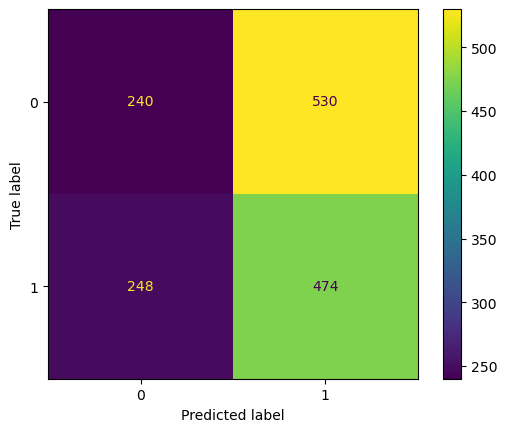

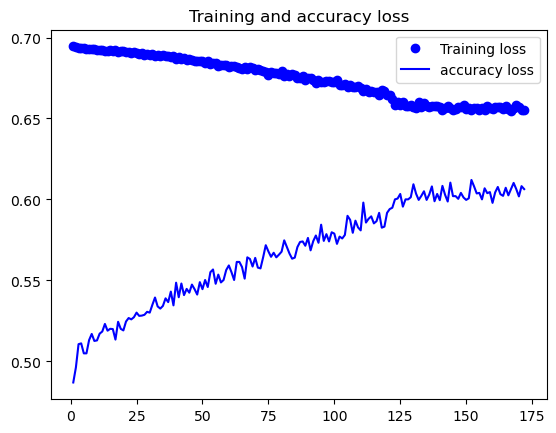

Average Classification Metrics for All Models on test set:
Average Accuracy: 0.49676427418052904
Average Precision: 0.47474838306742717
Average Recall: 0.49676427418052904
Average F-Score: 0.4575834960749729


In [10]:
# evaluate the models in the archive
evaluate_models_archive(lstm_hp_models_archive_1d)

##### robust_scaler

In [11]:
# insert the stock symbols into a list
symbols_list = ['PFE', 'ROP', 'XYL', 'CPAY', 'INCY']

# load the stock data for the 5 companies into a dictionary
dfs_1d = loadData(symbols=symbols_list, period='max', interval='1d')

# add the targets and technical indicators to each dataframe in the dictionary
full_dfs_1d = add_targets_and_indicators(dfs_1d.copy())

# get the trend up ratio of all the dataframes in the dictionary to get a sense of how balanced the data is
calculate_data_balance(full_dfs_1d)

# get the common sense baseline for each dataframe in the dictionary
calculate_common_sense_baseline(full_dfs_1d)

# apply the 3 steps of preparing data for training on each dataframe in the dictionary
target = 'classification' # set the target
timesteps = 10 # set the timesteps
data_sets_1d = prepare_data_to_train(full_dfs_1d.copy(), robust_scaler, target, timesteps)

# set the model initialization inputs
X_train_shape = data_sets_1d['PFE']['X_train'].shape
model_type='classification'
layer_type='LSTM'
tuner = Hyperband

# create the model
lstm_hp_model_1d = HP_RNNModel(X_train_shape, layer_type)


# create models archive for simpleRNN classification approach
lstm_hp_models_archive_1d_rs = create_models_archive(lstm_hp_model_1d, 
                                                 data_sets_1d, 
                                                 _model_type=model_type, 
                                                 _tuner=tuner, 
                                                 _epochs=200, 
                                                 _model_name='lstm_hp_model_1d', 
                                                 _project_name='lstm_hp_models_archive_1d_rs')

Data loaded from directory
The Trend up ratio of PFE is 0.49853935397713045 for 11981 rows
The Trend up ratio of ROP is 0.5233549700903652 for 7857 rows
The Trend up ratio of XYL is 0.52059100911663 for 3181 rows
The Trend up ratio of CPAY is 0.5344320188346086 for 3398 rows
The Trend up ratio of INCY is 0.492940863079382 for 7508 rows
The Average Trend up ratio is: 0.5139716430196233
The common sense score of PFE is: 0.5008763876137218
The common sense score of ROP is: 0.49077255950108184
The common sense score of XYL is: 0.49324111914492297
The common sense score of CPAY is: 0.49028840494408477
The common sense score of INCY is: 0.5077250932338838
The Average common sense score is: 0.496580712887539
Reloading Tuner from keras_tuner_models\lstm_hp_models_archive_1d_rs/PFE\tuner0.json
Results summary
Results in keras_tuner_models\lstm_hp_models_archive_1d_rs/PFE
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0027 summary
Hyperparameters:
hp_layers: 2
hp_u

49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
training for the ROP model was done in: 0:15:19.848171
Reloading Tuner from keras_tuner_models\lstm_hp_models_archive_1d_rs/XYL\tuner0.json
Results summary
Results in keras_tuner_models\lstm_hp_models_archive_1d_rs/XYL
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0000 summary
Hyperparameters:
hp_layers: 4
hp_units_at_hp_layer_0: 64
recurrent_dropout_0: 0.4
hp_units_at_hp_layer_1: 128
recurrent_dropout_1: 0.4
learning_rate: 0.0026385629878377535
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
hp_units_at_hp_layer_2: 64
recurrent_dropout_2: 0.0
hp_units_at_hp_layer_3: 64
recurrent_dropout_3: 0.0
batch_size: 32
Score: 0.5251572132110596

Trial 0015 summary
Hyperparameters:
hp_layers: 4
hp_units_at_hp_layer_0: 128
recurrent_dropout_0: 0.1
hp_units_at_hp_layer_1: 64
recurrent_dropout_1: 0.2
learning_rate: 0.0009294745699713808
hp_units_at_hp_layer_2: 128
recurrent_dropout_2: 0.2
hp_units_at_hp_la

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
training for the CPAY model was done in: 0:24:54.563354
Reloading Tuner from keras_tuner_models\lstm_hp_models_archive_1d_rs/INCY\tuner0.json
Results summary
Results in keras_tuner_models\lstm_hp_models_archive_1d_rs/INCY
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0027 summary
Hyperparameters:
hp_layers: 2
hp_units_at_hp_layer_0: 64
recurrent_dropout_0: 0.30000000000000004
hp_units_at_hp_layer_1: 64
recurrent_dropout_1: 0.0
learning_rate: 0.0012650614556534965
hp_units_at_hp_layer_2: 128
recurrent_dropout_2: 0.30000000000000004
hp_units_at_hp_layer_3: 128
recurrent_dropout_3: 0.0
batch_size: 32
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.5196535587310791

Trial 0026 summary
Hyperparameters:
hp_layers: 2
hp_units_at_hp_layer_0: 128
recurrent_dropout_0: 0.0
hp_units_at_hp_layer_1: 128
recurrent_dropout_1: 0.1
learning_rate: 0.0005347601471523541
hp_units_at_hp_layer_2: 128
recu

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                       │ (None, 10, 64)              │          35,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 204,680 (799.54 KB)

 Trainable params: 68,226 (266.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 136,454 (533.03 KB)

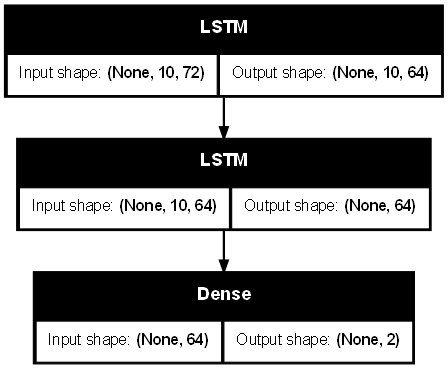

The PFE Model Classification Metrics for test set:
Accuracy: 0.4901550062840385
Precision: 0.49013507271608486
Recall: 0.4901550062840385
F-Score: 0.49014426548627676
--------------------------------------------------------------


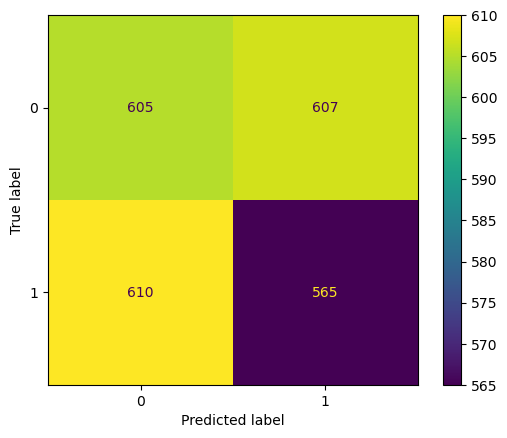

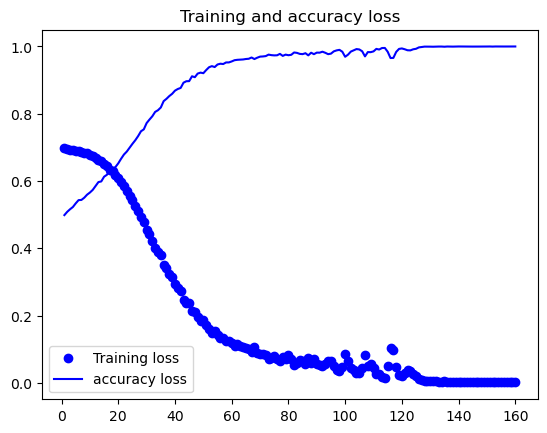

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                       │ (None, 10, 64)              │          35,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_17 (LSTM)                       │ (None, 10, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_18 (LSTM)                       │ (None, 10, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_19 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 945,032 (3.61 MB)

 Trainable params: 315,010 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 630,022 (2.40 MB)

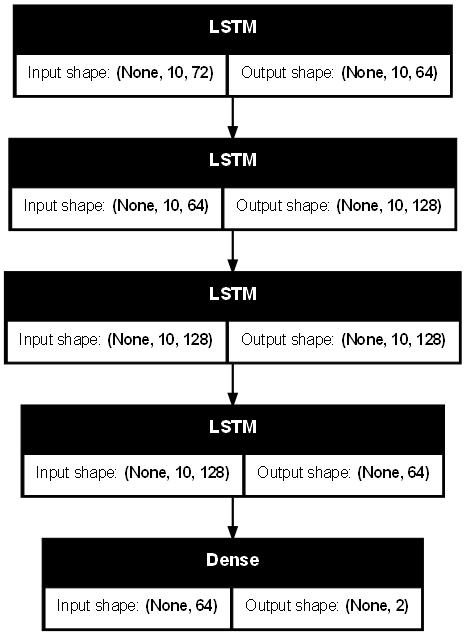

The ROP Model Classification Metrics for test set:
Accuracy: 0.5275288092189501
Precision: 0.5159885407934857
Recall: 0.5275288092189501
F-Score: 0.5056554874191502
--------------------------------------------------------------


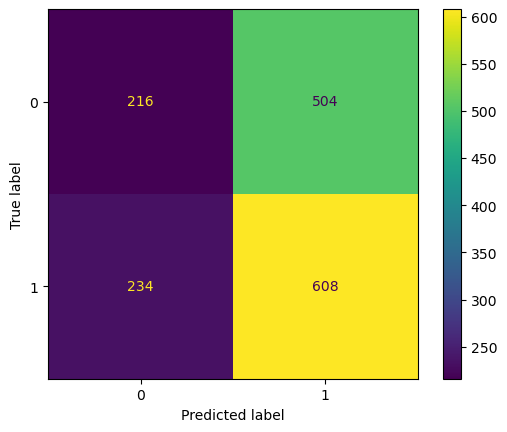

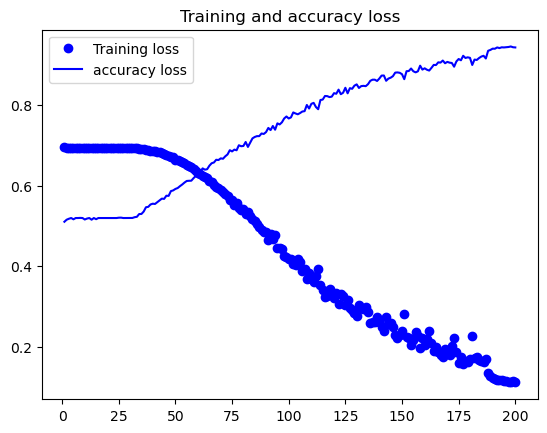

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_20 (LSTM)                       │ (None, 10, 64)              │          35,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_21 (LSTM)                       │ (None, 10, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_22 (LSTM)                       │ (None, 10, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_23 (LSTM)                       │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 649,352 (2.48 MB)

 Trainable params: 216,450 (845.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 432,902 (1.65 MB)

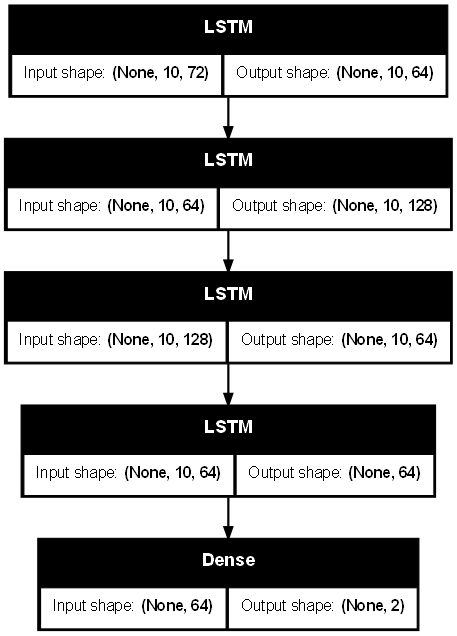

The XYL Model Classification Metrics for test set:
Accuracy: 0.507177033492823
Precision: 0.5116978244394379
Recall: 0.507177033492823
F-Score: 0.5063166411230705
--------------------------------------------------------------


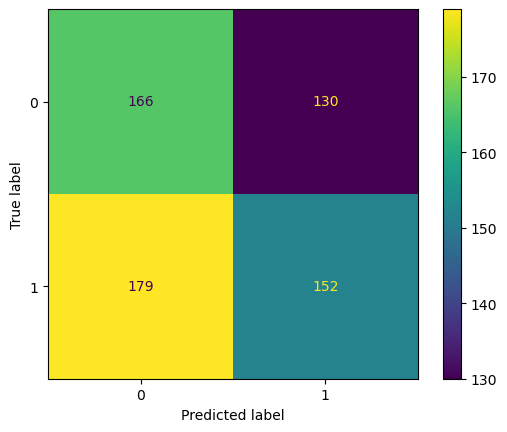

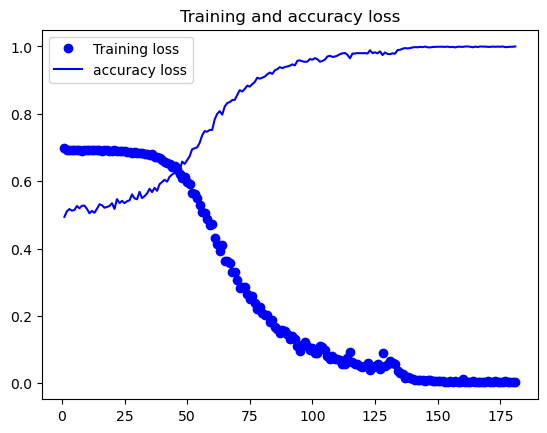

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_24 (LSTM)                       │ (None, 10, 128)             │         102,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_25 (LSTM)                       │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 704,264 (2.69 MB)

 Trainable params: 234,754 (917.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 469,510 (1.79 MB)

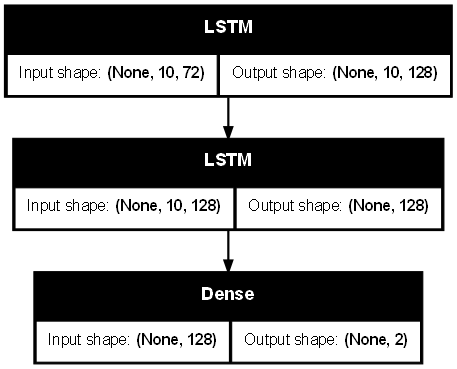

The CPAY Model Classification Metrics for test set:
Accuracy: 0.5074626865671642
Precision: 0.5108328119879644
Recall: 0.5074626865671642
F-Score: 0.5082626597149186
--------------------------------------------------------------


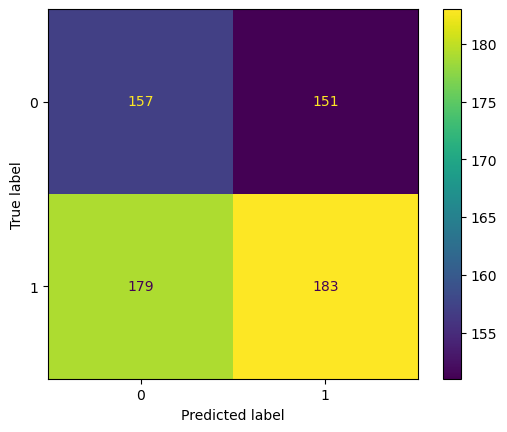

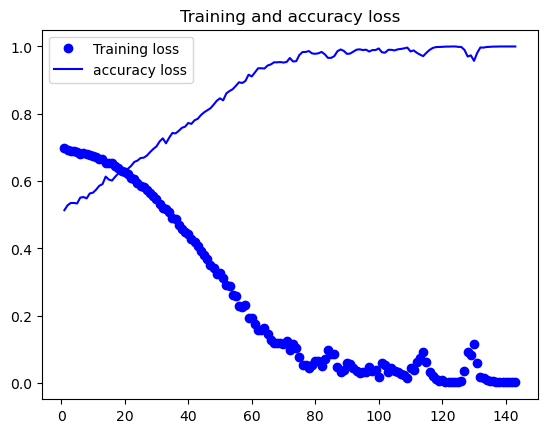

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_26 (LSTM)                       │ (None, 10, 64)              │          35,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_27 (LSTM)                       │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 204,680 (799.54 KB)

 Trainable params: 68,226 (266.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 136,454 (533.03 KB)

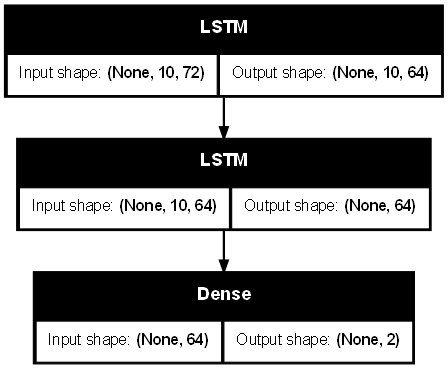

The INCY Model Classification Metrics for test set:
Accuracy: 0.5060321715817694
Precision: 0.506484313195784
Recall: 0.5060321715817694
F-Score: 0.5061580311753645
--------------------------------------------------------------


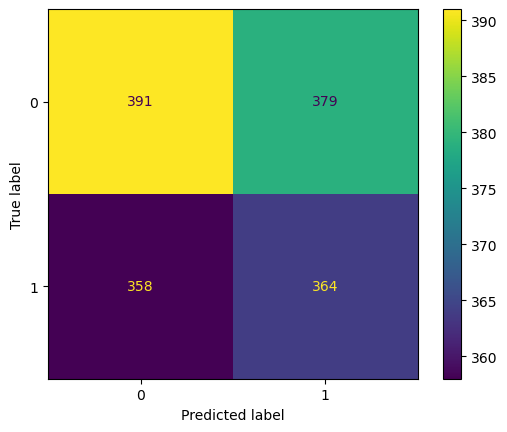

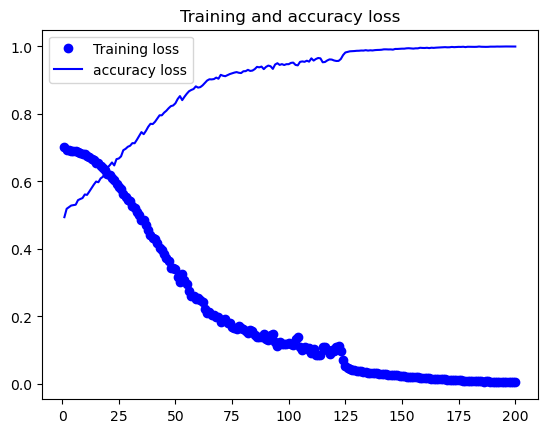

Average Classification Metrics for All Models on test set:
Average Accuracy: 0.507671141428949
Average Precision: 0.5070277126265513
Average Recall: 0.507671141428949
Average F-Score: 0.5033074169837561


In [12]:
# evaluate the models in the archive
evaluate_models_archive(lstm_hp_models_archive_1d_rs)

##### timesteps = 20

In [13]:
# insert the stock symbols into a list
symbols_list = ['PFE', 'ROP', 'XYL', 'CPAY', 'INCY']

# load the stock data for the 5 companies into a dictionary
dfs_1d = loadData(symbols=symbols_list, period='max', interval='1d')

# add the targets and technical indicators to each dataframe in the dictionary
full_dfs_1d = add_targets_and_indicators(dfs_1d.copy())

# get the trend up ratio of all the dataframes in the dictionary to get a sense of how balanced the data is
calculate_data_balance(full_dfs_1d)

# get the common sense baseline for each dataframe in the dictionary
calculate_common_sense_baseline(full_dfs_1d)

# apply the 3 steps of preparing data for training on each dataframe in the dictionary
target = 'classification' # set the target
timesteps = 20 # set the timesteps
data_sets_1d = prepare_data_to_train(full_dfs_1d.copy(), robust_scaler, target, timesteps)

# set the model initialization inputs
X_train_shape = data_sets_1d['PFE']['X_train'].shape
model_type='classification'
layer_type='LSTM'
tuner = Hyperband

# create the model
lstm_hp_model_1d = HP_RNNModel(X_train_shape, layer_type)


# create models archive for simpleRNN classification approach
lstm_hp_models_archive_1d_rs = create_models_archive(lstm_hp_model_1d, 
                                                 data_sets_1d, 
                                                 _model_type=model_type, 
                                                 _tuner=tuner, 
                                                 _epochs=200, 
                                                 _model_name='lstm_hp_model_1d', 
                                                 _project_name='lstm_hp_models_archive_1d_rs')

Data loaded from directory
The Trend up ratio of PFE is 0.49853935397713045 for 11981 rows
The Trend up ratio of ROP is 0.5233549700903652 for 7857 rows
The Trend up ratio of XYL is 0.52059100911663 for 3181 rows
The Trend up ratio of CPAY is 0.5344320188346086 for 3398 rows
The Trend up ratio of INCY is 0.492940863079382 for 7508 rows
The Average Trend up ratio is: 0.5139716430196233
The common sense score of PFE is: 0.5008763876137218
The common sense score of ROP is: 0.49077255950108184
The common sense score of XYL is: 0.49324111914492297
The common sense score of CPAY is: 0.49028840494408477
The common sense score of INCY is: 0.5077250932338838
The Average common sense score is: 0.496580712887539
Reloading Tuner from keras_tuner_models\lstm_hp_models_archive_1d_rs/PFE\tuner0.json
Results summary
Results in keras_tuner_models\lstm_hp_models_archive_1d_rs/PFE
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0027 summary
Hyperparameters:
hp_layers: 2
hp_u

49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
training for the ROP model was done in: 0:09:39.757815
Reloading Tuner from keras_tuner_models\lstm_hp_models_archive_1d_rs/XYL\tuner0.json
Results summary
Results in keras_tuner_models\lstm_hp_models_archive_1d_rs/XYL
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0000 summary
Hyperparameters:
hp_layers: 4
hp_units_at_hp_layer_0: 64
recurrent_dropout_0: 0.4
hp_units_at_hp_layer_1: 128
recurrent_dropout_1: 0.4
learning_rate: 0.0026385629878377535
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
hp_units_at_hp_layer_2: 64
recurrent_dropout_2: 0.0
hp_units_at_hp_layer_3: 64
recurrent_dropout_3: 0.0
batch_size: 32
Score: 0.5251572132110596

Trial 0015 summary
Hyperparameters:
hp_layers: 4
hp_units_at_hp_layer_0: 128
recurrent_dropout_0: 0.1
hp_units_at_hp_layer_1: 64
recurrent_dropout_1: 0.2
learning_rate: 0.0009294745699713808
hp_units_at_hp_layer_2: 128
recurrent_dropout_2: 0.2
hp_units_at_hp_la

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
training for the CPAY model was done in: 0:14:15.160150
Reloading Tuner from keras_tuner_models\lstm_hp_models_archive_1d_rs/INCY\tuner0.json
Results summary
Results in keras_tuner_models\lstm_hp_models_archive_1d_rs/INCY
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0027 summary
Hyperparameters:
hp_layers: 2
hp_units_at_hp_layer_0: 64
recurrent_dropout_0: 0.30000000000000004
hp_units_at_hp_layer_1: 64
recurrent_dropout_1: 0.0
learning_rate: 0.0012650614556534965
hp_units_at_hp_layer_2: 128
recurrent_dropout_2: 0.30000000000000004
hp_units_at_hp_layer_3: 128
recurrent_dropout_3: 0.0
batch_size: 32
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.5196535587310791

Trial 0026 summary
Hyperparameters:
hp_layers: 2
hp_units_at_hp_layer_0: 128
recurrent_dropout_0: 0.0
hp_units_at_hp_layer_1: 128
recurrent_dropout_1: 0.1
learning_rate: 0.0005347601471523541
hp_units_at_hp_layer_2: 128
recu

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_28 (LSTM)                       │ (None, 20, 64)              │          35,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_29 (LSTM)                       │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 204,680 (799.54 KB)

 Trainable params: 68,226 (266.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 136,454 (533.03 KB)

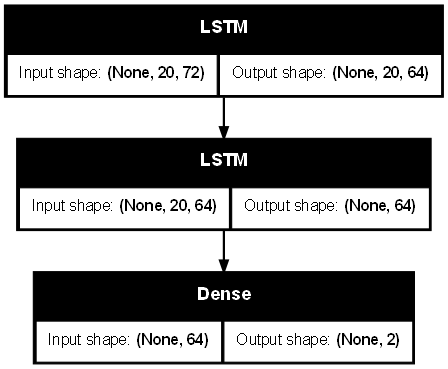

The PFE Model Classification Metrics for test set:
Accuracy: 0.503155237694573
Precision: 0.5033420648942091
Recall: 0.503155237694573
F-Score: 0.5031837293990619
--------------------------------------------------------------


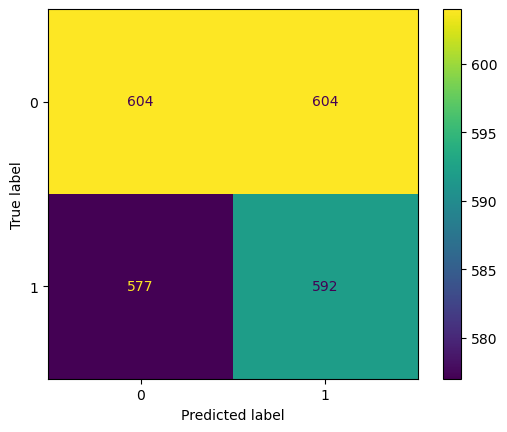

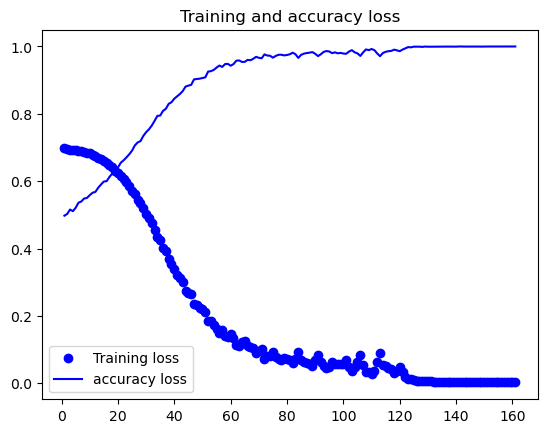

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_30 (LSTM)                       │ (None, 20, 64)              │          35,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_31 (LSTM)                       │ (None, 20, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_32 (LSTM)                       │ (None, 20, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_33 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 945,032 (3.61 MB)

 Trainable params: 315,010 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 630,022 (2.40 MB)

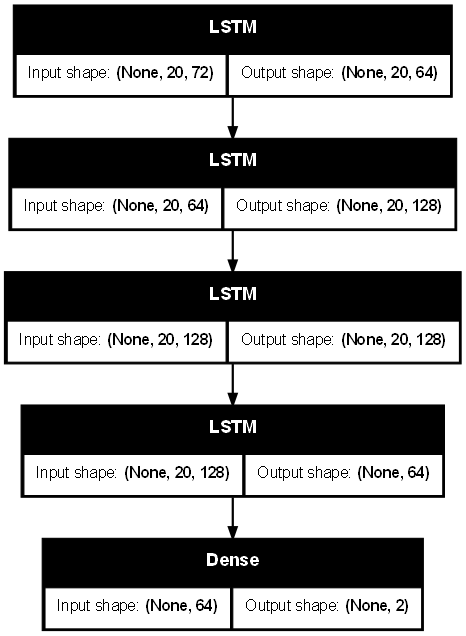

The ROP Model Classification Metrics for test set:
Accuracy: 0.5393041237113402
Precision: 0.5212516482857827
Recall: 0.5393041237113402
F-Score: 0.3801889294901849
--------------------------------------------------------------


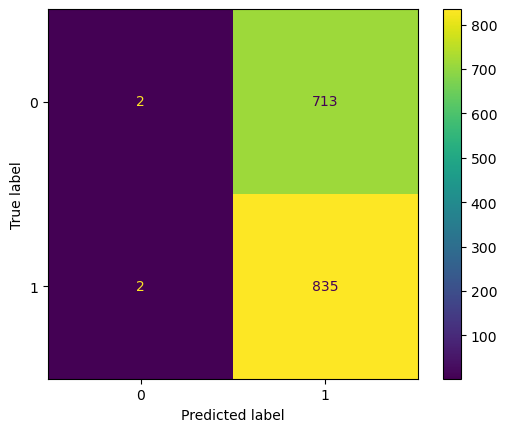

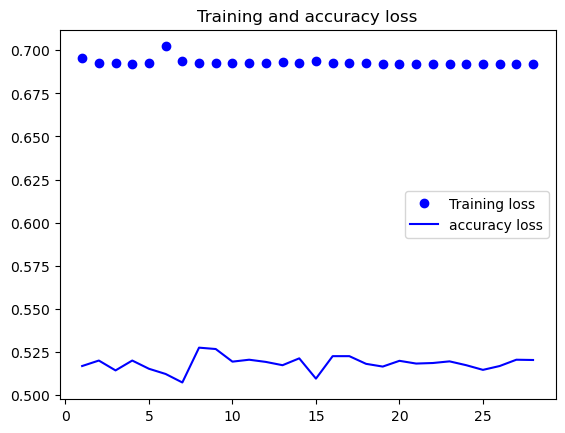

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_34 (LSTM)                       │ (None, 20, 64)              │          35,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_35 (LSTM)                       │ (None, 20, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_36 (LSTM)                       │ (None, 20, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_37 (LSTM)                       │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 649,352 (2.48 MB)

 Trainable params: 216,450 (845.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 432,902 (1.65 MB)

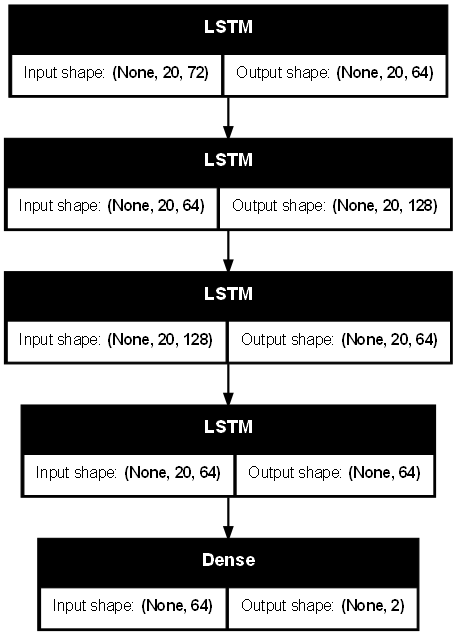

The XYL Model Classification Metrics for test set:
Accuracy: 0.5364667747163695
Precision: 0.539060306210431
Recall: 0.5364667747163695
F-Score: 0.4533384614360895
--------------------------------------------------------------


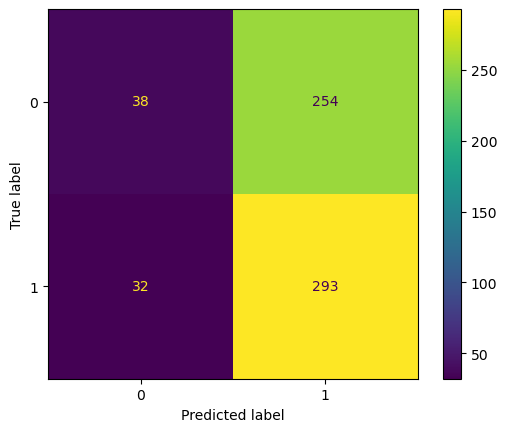

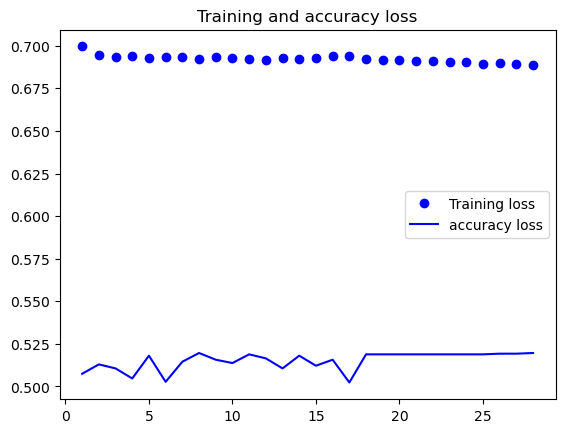

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_38 (LSTM)                       │ (None, 20, 128)             │         102,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_39 (LSTM)                       │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 704,264 (2.69 MB)

 Trainable params: 234,754 (917.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 469,510 (1.79 MB)

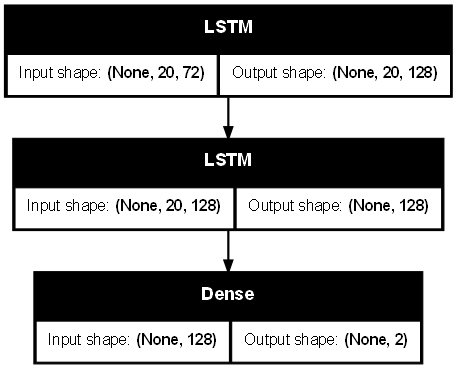

The CPAY Model Classification Metrics for test set:
Accuracy: 0.5121212121212121
Precision: 0.5132547002112219
Recall: 0.5121212121212121
F-Score: 0.5125708699902248
--------------------------------------------------------------


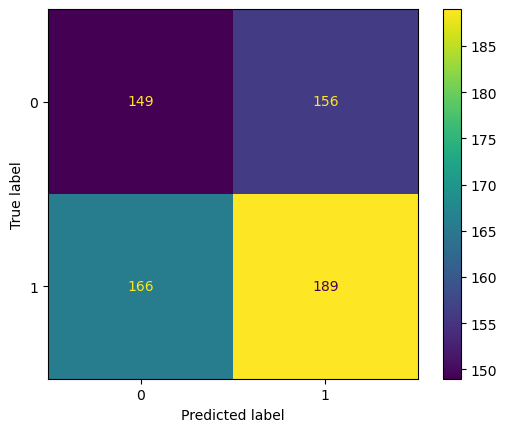

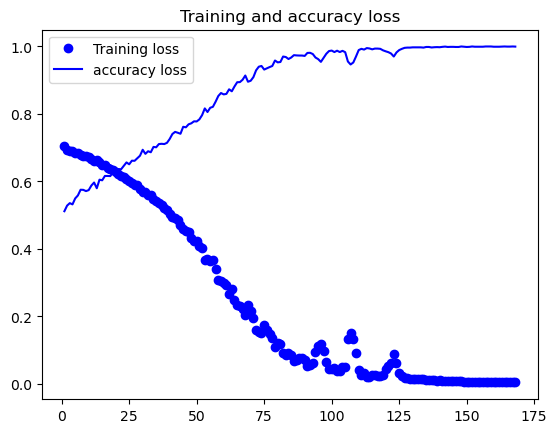

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_40 (LSTM)                       │ (None, 20, 64)              │          35,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_41 (LSTM)                       │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 204,680 (799.54 KB)

 Trainable params: 68,226 (266.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 136,454 (533.03 KB)

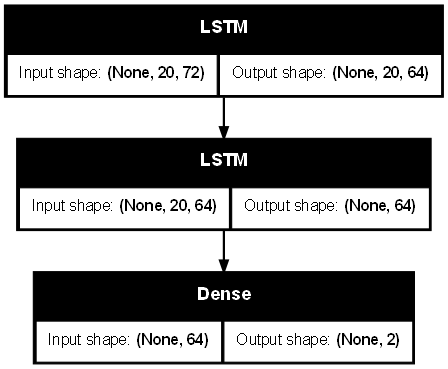

The INCY Model Classification Metrics for test set:
Accuracy: 0.50944669365722
Precision: 0.5104472169976729
Recall: 0.50944669365722
F-Score: 0.5094768462976
--------------------------------------------------------------


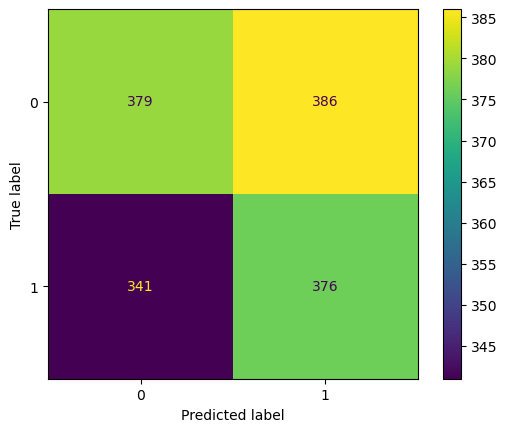

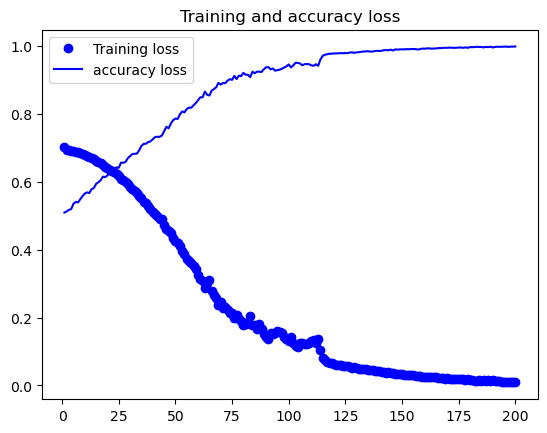

Average Classification Metrics for All Models on test set:
Average Accuracy: 0.520098808380143
Average Precision: 0.5174711873198634
Average Recall: 0.520098808380143
Average F-Score: 0.4717517673226322


In [14]:
# evaluate the models in the archive
evaluate_models_archive(lstm_hp_models_archive_1d_rs)

In [34]:
lstm_hp_models_archive_1d_rs['PFE']['model'].summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_56 (LSTM)                       │ (None, 20, 64)              │          35,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_57 (LSTM)                       │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 204,680 (799.54 KB)

 Trainable params: 68,226 (266.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 136,454 (533.03 KB)

In [31]:
lstm_hp_models_archive_1d_rs['PFE']['hyperparameters'].values

{'hp_layers': 2,
 'hp_units_at_hp_layer_0': 64,
 'recurrent_dropout_0': 0.30000000000000004,
 'hp_units_at_hp_layer_1': 64,
 'recurrent_dropout_1': 0.0,
 'learning_rate': 0.0012650614556534965,
 'hp_units_at_hp_layer_2': 128,
 'recurrent_dropout_2': 0.30000000000000004,
 'hp_units_at_hp_layer_3': 128,
 'recurrent_dropout_3': 0.0,
 'batch_size': 32,
 'tuner/epochs': 10,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

In [4]:
# insert the stock symbols into a list
symbols_list = ['PFE', 'ROP', 'XYL', 'CPAY', 'INCY']

# load the stock data for the 5 companies into a dictionary
dfs_1d = loadData(symbols=symbols_list, period='max', interval='1d')

# add the targets and technical indicators to each dataframe in the dictionary
full_dfs_1d = add_targets_and_indicators(dfs_1d.copy())

# get the trend up ratio of all the dataframes in the dictionary to get a sense of how balanced the data is
calculate_data_balance(full_dfs_1d)

# get the common sense baseline for each dataframe in the dictionary
calculate_common_sense_baseline(full_dfs_1d)

# apply the 3 steps of preparing data for training on each dataframe in the dictionary
target = 'classification' # set the target
timesteps = 20 # set the timesteps
data_sets_1d = prepare_data_to_train(full_dfs_1d.copy(), robust_scaler, target, timesteps)

# set the model initialization inputs
X_train_shape = data_sets_1d['PFE']['X_train'].shape
model_type='classification'
layer_type='LSTM'
tuner = Hyperband

# create the model
lstm_hp_model_1d = HP_RNNModel(X_train_shape, layer_type)


# create models archive for simpleRNN classification approach
lstm_hp_models_archive_1d_rs0 = create_models_archive(lstm_hp_model_1d, 
                                                 data_sets_1d, 
                                                 _model_type=model_type, 
                                                 _tuner=tuner, 
                                                 _epochs=10, 
                                                 _model_name='lstm_hp_model_1d', 
                                                 _project_name='lstm_hp_models_archive_1d_rs')

Data loaded from directory
The Trend up ratio of PFE is 0.49853935397713045 for 11981 rows
The Trend up ratio of ROP is 0.5233549700903652 for 7857 rows
The Trend up ratio of XYL is 0.52059100911663 for 3181 rows
The Trend up ratio of CPAY is 0.5344320188346086 for 3398 rows
The Trend up ratio of INCY is 0.492940863079382 for 7508 rows
The Average Trend up ratio is: 0.5139716430196233
The common sense score of PFE is: 0.5008763876137218
The common sense score of ROP is: 0.49077255950108184
The common sense score of XYL is: 0.49324111914492297
The common sense score of CPAY is: 0.49028840494408477
The common sense score of INCY is: 0.5077250932338838
The Average common sense score is: 0.496580712887539
Reloading Tuner from keras_tuner_models\lstm_hp_models_archive_1d_rs/PFE\tuner0.json
Results summary
Results in keras_tuner_models\lstm_hp_models_archive_1d_rs/PFE
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0027 summary
Hyperparameters:
hp_layers: 2
hp_u

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 20, 64)              │          35,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 68,226 (266.51 KB)

 Trainable params: 68,226 (266.51 KB)

 Non-trainable params: 0 (0.00 B)

75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
training for the PFE model was done in: 0:00:26.028854
Reloading Tuner from keras_tuner_models\lstm_hp_models_archive_1d_rs/ROP\tuner0.json
Results summary
Results in keras_tuner_models\lstm_hp_models_archive_1d_rs/ROP
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0022 summary
Hyperparameters:
hp_layers: 4
hp_units_at_hp_layer_0: 64
recurrent_dropout_0: 0.0
hp_units_at_hp_layer_1: 128
recurrent_dropout_1: 0.1
learning_rate: 0.006351062743654629
hp_units_at_hp_layer_2: 128
recurrent_dropout_2: 0.2
hp_units_at_hp_layer_3: 64
recurrent_dropout_3: 0.0
batch_size: 64
tuner/epochs: 4
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.5614258646965027

Trial 0025 summary
Hyperparameters:
hp_layers: 4
hp_units_at_hp_layer_0: 128
recurrent_dropout_0: 0.30000000000000004
hp_units_at_hp_layer_1: 128
recurrent_dropout_1: 0.1
learning_rate: 0.002317148288785831
hp_units_at_hp_layer_2: 64
recurrent_dropout_2: 0.1
hp_

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 20, 64)              │          35,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 20, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 20, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,010 (1.20 MB)

 Trainable params: 315,010 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
training for the ROP model was done in: 0:01:09.046811
Reloading Tuner from keras_tuner_models\lstm_hp_models_archive_1d_rs/XYL\tuner0.json
Results summary
Results in keras_tuner_models\lstm_hp_models_archive_1d_rs/XYL
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0000 summary
Hyperparameters:
hp_layers: 4
hp_units_at_hp_layer_0: 64
recurrent_dropout_0: 0.4
hp_units_at_hp_layer_1: 128
recurrent_dropout_1: 0.4
learning_rate: 0.0026385629878377535
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
hp_units_at_hp_layer_2: 64
recurrent_dropout_2: 0.0
hp_units_at_hp_layer_3: 64
recurrent_dropout_3: 0.0
batch_size: 32
Score: 0.5251572132110596

Trial 0015 summary
Hyperparameters:
hp_layers: 4
hp_units_at_hp_layer_0: 128
recurrent_dropout_0: 0.1
hp_units_at_hp_layer_1: 64
recurrent_dropout_1: 0.2
learning_rate: 0.0009294745699713808
hp_units_at_hp_layer_2: 128
recurrent_dropout_2: 0.2
hp_units_at_hp_la

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 20, 64)              │          35,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 20, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 20, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 216,450 (845.51 KB)

 Trainable params: 216,450 (845.51 KB)

 Non-trainable params: 0 (0.00 B)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
training for the XYL model was done in: 0:01:28.290412
Reloading Tuner from keras_tuner_models\lstm_hp_models_archive_1d_rs/CPAY\tuner0.json
Results summary
Results in keras_tuner_models\lstm_hp_models_archive_1d_rs/CPAY
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0026 summary
Hyperparameters:
hp_layers: 2
hp_units_at_hp_layer_0: 128
recurrent_dropout_0: 0.0
hp_units_at_hp_layer_1: 128
recurrent_dropout_1: 0.1
learning_rate: 0.0005347601471523541
hp_units_at_hp_layer_2: 128
recurrent_dropout_2: 0.1
hp_units_at_hp_layer_3: 128
recurrent_dropout_3: 0.0
batch_size: 32
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.5405007600784302

Trial 0006 summary
Hyperparameters:
hp_layers: 2
hp_units_at_hp_layer_0: 128
recurrent_dropout_0: 0.0
hp_units_at_hp_layer_1: 64
recurrent_dropout_1: 0.0
learning_rate: 0.0002868519531845337
hp_units_at_hp_layer_2: 128
recurrent_dropout_2: 0.1
hp_units_at

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                       │ (None, 20, 128)             │         102,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 234,754 (917.01 KB)

 Trainable params: 234,754 (917.01 KB)

 Non-trainable params: 0 (0.00 B)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
training for the CPAY model was done in: 0:01:41.591764
Reloading Tuner from keras_tuner_models\lstm_hp_models_archive_1d_rs/INCY\tuner0.json
Results summary
Results in keras_tuner_models\lstm_hp_models_archive_1d_rs/INCY
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0027 summary
Hyperparameters:
hp_layers: 2
hp_units_at_hp_layer_0: 64
recurrent_dropout_0: 0.30000000000000004
hp_units_at_hp_layer_1: 64
recurrent_dropout_1: 0.0
learning_rate: 0.0012650614556534965
hp_units_at_hp_layer_2: 128
recurrent_dropout_2: 0.30000000000000004
hp_units_at_hp_layer_3: 128
recurrent_dropout_3: 0.0
batch_size: 32
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.5196535587310791

Trial 0026 summary
Hyperparameters:
hp_layers: 2
hp_units_at_hp_layer_0: 128
recurrent_dropout_0: 0.0
hp_units_at_hp_layer_1: 128
recurrent_dropout_1: 0.1
learning_rate: 0.0005347601471523541
hp_units_at_hp_layer_2: 128
recu

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 20, 64)              │          35,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 68,226 (266.51 KB)

 Trainable params: 68,226 (266.51 KB)

 Non-trainable params: 0 (0.00 B)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
training for the INCY model was done in: 0:01:59.087045


In [5]:
lstm_hp_models_archive_1d_rs0['PFE']['model'].summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 20, 64)              │          35,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 204,680 (799.54 KB)

 Trainable params: 68,226 (266.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 136,454 (533.03 KB)

In [6]:
lstm_hp_models_archive_1d_rs0['PFE']['hyperparameters'].values

{'hp_layers': 2,
 'hp_units_at_hp_layer_0': 64,
 'recurrent_dropout_0': 0.30000000000000004,
 'hp_units_at_hp_layer_1': 64,
 'recurrent_dropout_1': 0.0,
 'learning_rate': 0.0012650614556534965,
 'hp_units_at_hp_layer_2': 128,
 'recurrent_dropout_2': 0.30000000000000004,
 'hp_units_at_hp_layer_3': 128,
 'recurrent_dropout_3': 0.0,
 'batch_size': 32,
 'tuner/epochs': 10,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

In [10]:
tuner = Hyperband(lstm_hp_model_1d, 
                objective='val_accuracy', 
                max_epochs=10, 
                factor=3, 
                hyperband_iterations=1, 
                seed=101)

modelx = tuner.hypermodel.build(lstm_hp_models_archive_1d_rs0['PFE']['hyperparameters'])

In [8]:
modelx.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                       │ (None, 20, 64)              │          35,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_17 (LSTM)                       │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 68,226 (266.51 KB)

 Trainable params: 68,226 (266.51 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
full_dfs_1d['PFE'].columns

Index(['adj close', 'close', 'high', 'low', 'open', 'volume', 'macd',
       'macd_histogram', 'macd_signal', 'rsi', 'sma', 'ema', 'bbands_lower',
       'bbands_mid', 'bbands_upper', 'bbands_bandwidth', 'bbands_percent',
       'dema', 'tema', 'roc', 'mom', 'kama', 'trix', 'trixs', 'hma', 'alma',
       'apo', 'cfo', 'cg', 'cmo', 'coppock', 'cti', 'decay', 'decreasing',
       'ebsw', 'entropy', 'aberration_zg', 'aberration_sg', 'aberration_xg',
       'aberration_atr', 'adx_adx', 'adx_dmp', 'adx_dmn', 'atr', 'stoch_k',
       'stoch_d', 'supertrend_trend', 'supertrend_direction', 'cci',
       'aroon_up', 'aroon_down', 'aroon_osc', 'natr', 'willr', 'vortex_vip',
       'vortex_vim', 'hlc3', 'ohlc4', 'accbands_lower', 'accbands_mid',
       'accbands_upper', 'chop', 'dm_positive', 'dm_negative',
       'donchian_lower', 'donchian_mid', 'donchian_upper', 'obv', 'vwma',
       'adosc', 'cmf', 'efi', 'next_close', 'trend'],
      dtype='object')

### 1 Day interval GRU with HP

In [24]:
# insert the stock symbols into a list
symbols_list = ['PFE', 'ROP', 'XYL', 'CPAY', 'INCY']

# load the stock data for the 5 companies into a dictionary
dfs_1d = loadData(symbols=symbols_list, period='max', interval='1d')

# add the targets and technical indicators to each dataframe in the dictionary
full_dfs_1d = add_targets_and_indicators(dfs_1d.copy())

# get the trend up ratio of all the dataframes in the dictionary to get a sense of how balanced the data is
calculate_data_balance(full_dfs_1d)

# get the common sense baseline for each dataframe in the dictionary
calculate_common_sense_baseline(full_dfs_1d)

# apply the 3 steps of preparing data for training on each dataframe in the dictionary
target = 'classification' # set the target
timesteps = 10 # set the timesteps
data_sets_1d = prepare_data_to_train(full_dfs_1d.copy(), min_max_scaler, target, timesteps)

# set the model initialization inputs
X_train_shape = data_sets_1d['PFE']['X_train'].shape
model_type='classification'
layer_type='GRU'
tuner = Hyperband

# create the model
gru_hp_model_1d = HP_RNNModel(X_train_shape, layer_type)


# create models archive for simpleRNN classification approach
gru_hp_models_archive_1d = create_models_archive(gru_hp_model_1d, 
                                                 data_sets_1d, 
                                                 _model_type=model_type, 
                                                 _tuner=tuner, 
                                                 _epochs=100, 
                                                 _model_name='gru_hp_model_1d', 
                                                 _project_name='gru_hp_models_archive_1d')

Data loaded from directory
The Trend up ratio of PFE is 0.49853935397713045 for 11981 rows
The Trend up ratio of ROP is 0.5233549700903652 for 7857 rows
The Trend up ratio of XYL is 0.52059100911663 for 3181 rows
The Trend up ratio of CPAY is 0.5344320188346086 for 3398 rows
The Trend up ratio of INCY is 0.492940863079382 for 7508 rows
The Average Trend up ratio is: 0.5139716430196233
The common sense score of PFE is: 0.5008763876137218
The common sense score of ROP is: 0.49077255950108184
The common sense score of XYL is: 0.49324111914492297
The common sense score of CPAY is: 0.49028840494408477
The common sense score of INCY is: 0.5077250932338838
The Average common sense score is: 0.496580712887539
Reloading Tuner from keras_tuner_models\gru_hp_models_archive_1d/PFE\tuner0.json
Results summary
Results in keras_tuner_models\gru_hp_models_archive_1d/PFE
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0026 summary
Hyperparameters:
hp_layers: 2
hp_units_at_

49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step
training for the ROP model was done in: 0:09:19.436483
Reloading Tuner from keras_tuner_models\gru_hp_models_archive_1d/XYL\tuner0.json
Results summary
Results in keras_tuner_models\gru_hp_models_archive_1d/XYL
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0017 summary
Hyperparameters:
hp_layers: 2
hp_units_at_hp_layer_0: 128
recurrent_dropout_0: 0.0
hp_units_at_hp_layer_1: 64
recurrent_dropout_1: 0.0
learning_rate: 0.0002868519531845337
hp_units_at_hp_layer_2: 128
recurrent_dropout_2: 0.1
hp_units_at_hp_layer_3: 128
recurrent_dropout_3: 0.30000000000000004
batch_size: 32
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0013
Score: 0.5172955989837646

Trial 0028 summary
Hyperparameters:
hp_layers: 2
hp_units_at_hp_layer_0: 64
recurrent_dropout_0: 0.30000000000000004
hp_units_at_hp_layer_1: 64
recurrent_dropout_1: 0.2
learning_rate: 0.0003555649369416632
hp_units_at_hp_layer_2:

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
training for the CPAY model was done in: 0:12:44.737348
Reloading Tuner from keras_tuner_models\gru_hp_models_archive_1d/INCY\tuner0.json
Results summary
Results in keras_tuner_models\gru_hp_models_archive_1d/INCY
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0026 summary
Hyperparameters:
hp_layers: 2
hp_units_at_hp_layer_0: 128
recurrent_dropout_0: 0.0
hp_units_at_hp_layer_1: 128
recurrent_dropout_1: 0.1
learning_rate: 0.0005347601471523541
hp_units_at_hp_layer_2: 128
recurrent_dropout_2: 0.1
hp_units_at_hp_layer_3: 128
recurrent_dropout_3: 0.0
batch_size: 32
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.5276482105255127

Trial 0008 summary
Hyperparameters:
hp_layers: 2
hp_units_at_hp_layer_0: 128
recurrent_dropout_0: 0.1
hp_units_at_hp_layer_1: 64
recurrent_dropout_1: 0.30000000000000004
learning_rate: 0.000926543735982781
hp_units_at_hp_layer_2: 64
recurrent_dropout_2: 0.300000

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                          │ (None, 10, 128)             │          77,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 128)                 │          99,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 530,696 (2.02 MB)

 Trainable params: 176,898 (691.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 353,798 (1.35 MB)

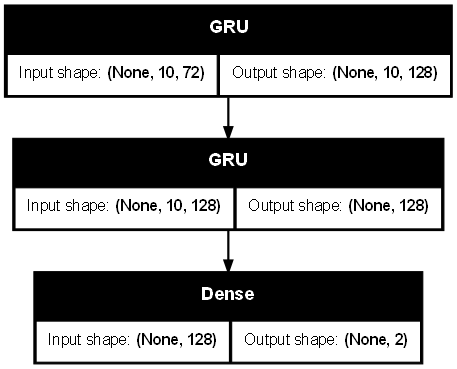

The PFE Model Classification Metrics for test set:
Accuracy: 0.4968579807289485
Precision: 0.49594984854046587
Recall: 0.4968579807289485
F-Score: 0.49490488756889467
--------------------------------------------------------------


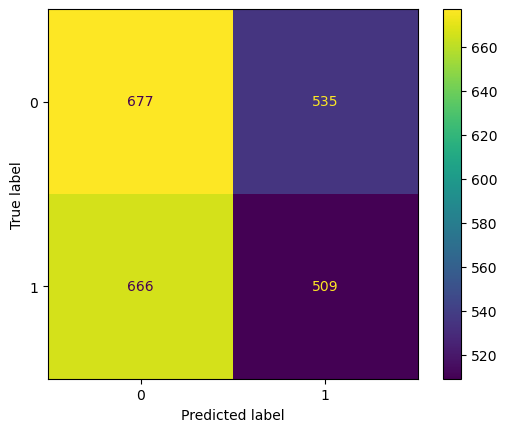

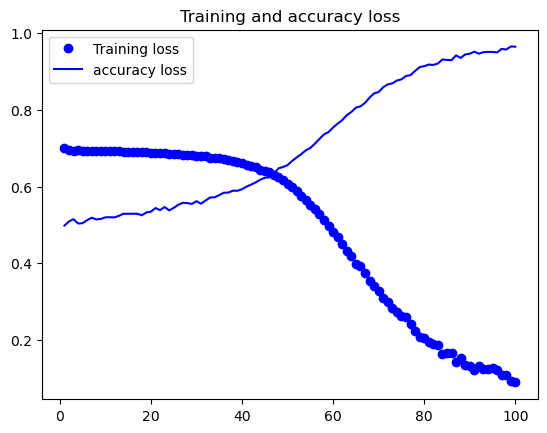

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_4 (GRU)                          │ (None, 10, 128)             │          77,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_5 (GRU)                          │ (None, 10, 128)             │          99,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_6 (GRU)                          │ (None, 10, 64)              │          37,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_7 (GRU)                          │ (None, 128)                 │          74,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 865,928 (3.30 MB)

 Trainable params: 288,642 (1.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 577,286 (2.20 MB)

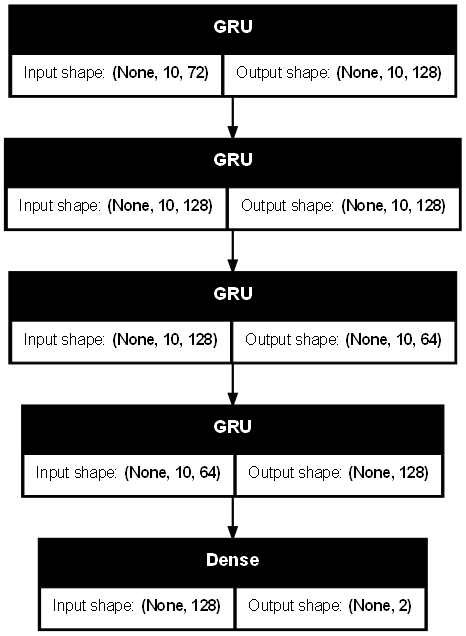

The ROP Model Classification Metrics for test set:
Accuracy: 0.5384122919334187
Precision: 0.5101883794062825
Recall: 0.5384122919334187
F-Score: 0.3883981101036553
--------------------------------------------------------------


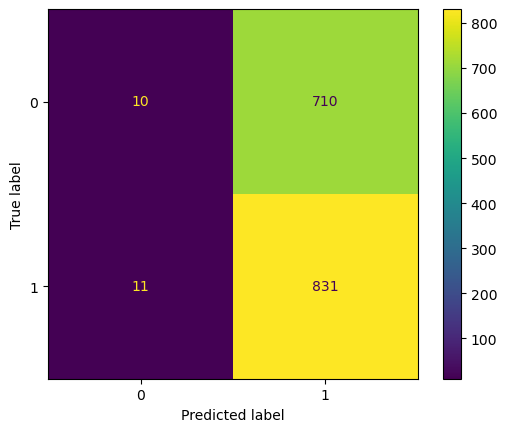

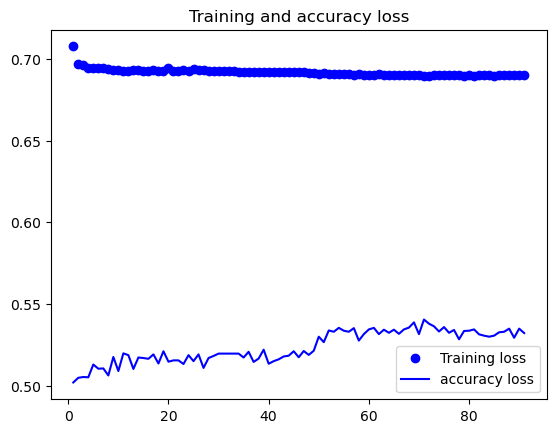

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_8 (GRU)                          │ (None, 10, 128)             │          77,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_9 (GRU)                          │ (None, 64)                  │          37,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 344,840 (1.32 MB)

 Trainable params: 114,946 (449.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 229,894 (898.03 KB)

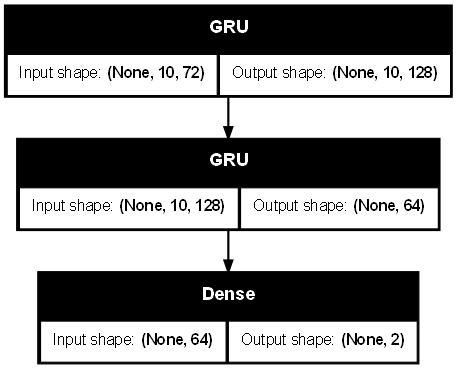

The XYL Model Classification Metrics for test set:
Accuracy: 0.5215311004784688
Precision: 0.5246897470182956
Recall: 0.5215311004784688
F-Score: 0.5215724812566982
--------------------------------------------------------------


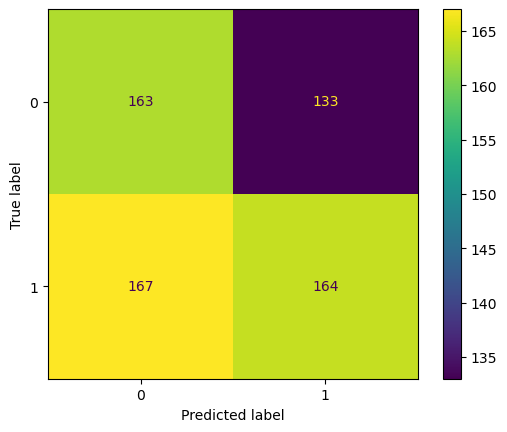

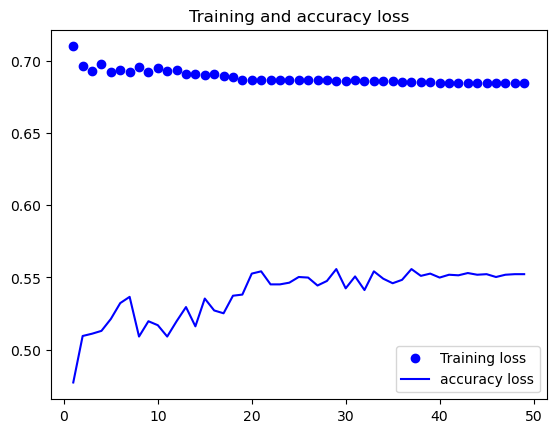

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_10 (GRU)                         │ (None, 10, 128)             │          77,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_11 (GRU)                         │ (None, 128)                 │          99,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 530,696 (2.02 MB)

 Trainable params: 176,898 (691.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 353,798 (1.35 MB)

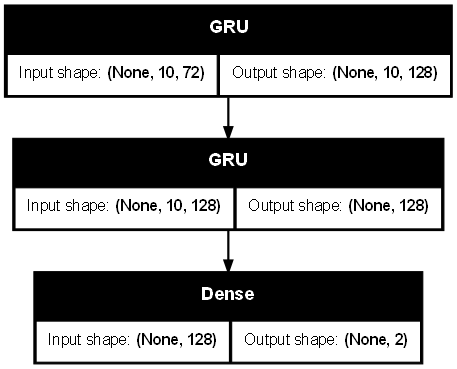

The CPAY Model Classification Metrics for test set:
Accuracy: 0.491044776119403
Precision: 0.49334380335730077
Recall: 0.491044776119403
F-Score: 0.49180080498829354
--------------------------------------------------------------


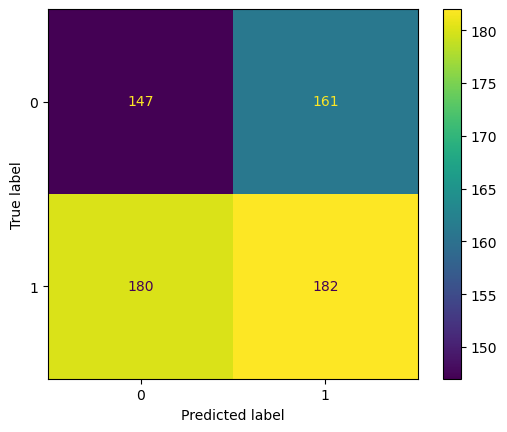

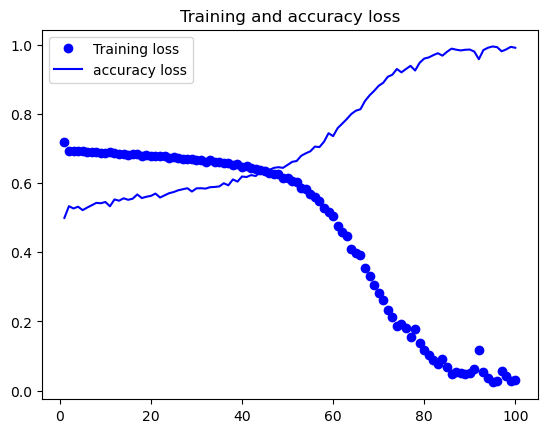

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_12 (GRU)                         │ (None, 10, 128)             │          77,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_13 (GRU)                         │ (None, 128)                 │          99,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 530,696 (2.02 MB)

 Trainable params: 176,898 (691.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 353,798 (1.35 MB)

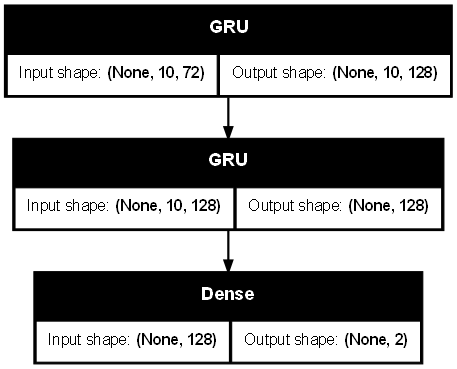

The INCY Model Classification Metrics for test set:
Accuracy: 0.5060321715817694
Precision: 0.5065715115892976
Recall: 0.5060321715817694
F-Score: 0.5061597955020135
--------------------------------------------------------------


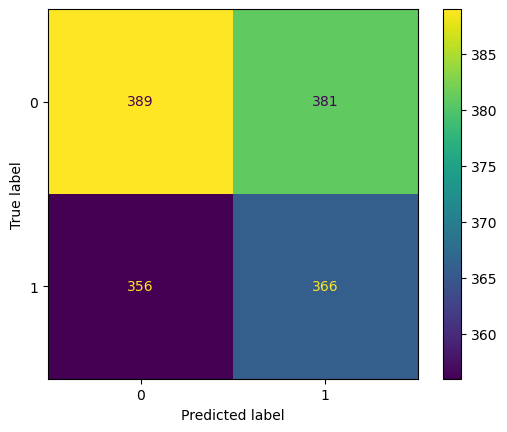

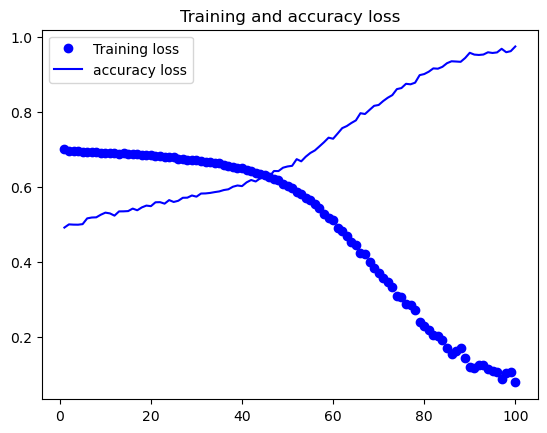

Average Classification Metrics for All Models on test set:
Average Accuracy: 0.5107756641684016
Average Precision: 0.5061486579823284
Average Recall: 0.5107756641684016
Average F-Score: 0.48056721588391105


In [25]:
# evaluate the models in the archive
evaluate_models_archive(gru_hp_models_archive_1d)

### 1 Hour interval LSTM with HP

In [26]:
# insert the stock symbols into a list
symbols_list = ['PFE', 'ROP', 'XYL', 'CPAY', 'INCY']

# load the stock data for the 5 companies into a dictionary
dfs_1h = loadData(symbols=symbols_list, period='2y', interval='1h')

# add the targets and technical indicators to each dataframe in the dictionary
full_dfs_1h = add_targets_and_indicators(dfs_1h.copy())

# get the trend up ratio of all the dataframes in the dictionary to get a sense of how balanced the data is
calculate_data_balance(full_dfs_1h)

# get the common sense baseline for each dataframe in the dictionary
calculate_common_sense_baseline(full_dfs_1h)

# apply the 3 steps of preparing data for training on each dataframe in the dictionary
target = 'classification' # set the target
timesteps = 10 # set the timesteps
data_sets_1h = prepare_data_to_train(full_dfs_1h.copy(), min_max_scaler, target, timesteps)

# set the model initialization inputs
X_train_shape = data_sets_1h['PFE']['X_train'].shape
model_type='classification'
layer_type='LSTM'
tuner = Hyperband


# create the model
lstm_hp_model_1h = HP_RNNModel(X_train_shape, layer_type)


# create models archive for simpleRNN classification approach
lstm_hp_models_archive_1h = create_models_archive(lstm_hp_model_1h, 
                                                 data_sets_1h, 
                                                 _model_type=model_type, 
                                                 _tuner=tuner, 
                                                 _epochs=100, 
                                                 _model_name='lstm_hp_model_1h', 
                                                 _project_name='lstm_hp_models_archive_1h')

Data loaded from directory
The Trend up ratio of PFE is 0.49176954732510286 for 3402 rows
The Trend up ratio of ROP is 0.5046457607433217 for 3444 rows
The Trend up ratio of XYL is 0.5246427529892097 for 3429 rows
The Trend up ratio of CPAY is 0.5013513513513513 for 740 rows
The Trend up ratio of INCY is 0.5026455026455027 for 3402 rows
The Average Trend up ratio is: 0.5050109830108978
The common sense score of PFE is: 0.4950029394473839
The common sense score of ROP is: 0.4921602787456446
The common sense score of XYL is: 0.5121026538349372
The common sense score of CPAY is: 0.4972972972972973
The common sense score of INCY is: 0.5014697236919459
The Average common sense score is: 0.49960657860344176
Reloading Tuner from keras_tuner_models\lstm_hp_models_archive_1h/PFE\tuner0.json
Results summary
Results in keras_tuner_models\lstm_hp_models_archive_1h/PFE
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0024 summary
Hyperparameters:
hp_layers: 2
hp_units_a

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
training for the ROP model was done in: 0:03:19.669929
Reloading Tuner from keras_tuner_models\lstm_hp_models_archive_1h/XYL\tuner0.json
Results summary
Results in keras_tuner_models\lstm_hp_models_archive_1h/XYL
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0015 summary
Hyperparameters:
hp_layers: 4
hp_units_at_hp_layer_0: 128
recurrent_dropout_0: 0.1
hp_units_at_hp_layer_1: 64
recurrent_dropout_1: 0.2
learning_rate: 0.0009294745699713808
hp_units_at_hp_layer_2: 128
recurrent_dropout_2: 0.2
hp_units_at_hp_layer_3: 64
recurrent_dropout_3: 0.0
batch_size: 32
tuner/epochs: 4
tuner/initial_epoch: 2
tuner/bracket: 2
tuner/round: 1
tuner/trial_id: 0003
Score: 0.5416058301925659

Trial 0007 summary
Hyperparameters:
hp_layers: 2
hp_units_at_hp_layer_0: 128
recurrent_dropout_0: 0.2
hp_units_at_hp_layer_1: 64
recurrent_dropout_1: 0.4
learning_rate: 0.007893028127349816
hp_units_at_hp_layer_2: 128
recurrent_dropout_2: 0.0
hp

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step
training for the CPAY model was done in: 0:04:11.108123
Reloading Tuner from keras_tuner_models\lstm_hp_models_archive_1h/INCY\tuner0.json
Results summary
Results in keras_tuner_models\lstm_hp_models_archive_1h/INCY
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0009 summary
Hyperparameters:
hp_layers: 4
hp_units_at_hp_layer_0: 128
recurrent_dropout_0: 0.2
hp_units_at_hp_layer_1: 64
recurrent_dropout_1: 0.1
learning_rate: 0.00012337256785879854
hp_units_at_hp_layer_2: 64
recurrent_dropout_2: 0.30000000000000004
hp_units_at_hp_layer_3: 64
recurrent_dropout_3: 0.1
batch_size: 32
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.5235294103622437

Trial 0016 summary
Hyperparameters:
hp_layers: 4
hp_units_at_hp_layer_0: 128
recurrent_dropout_0: 0.2
hp_units_at_hp_layer_1: 64
recurrent_dropout_1: 0.1
learning_rate: 0.00012337256785879854
hp_units_at_hp_layer_2: 64
recurrent_dropout_2: 0.300000

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_70 (LSTM)                       │ (None, 10, 64)              │          35,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_71 (LSTM)                       │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 402,440 (1.54 MB)

 Trainable params: 134,146 (524.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 268,294 (1.02 MB)

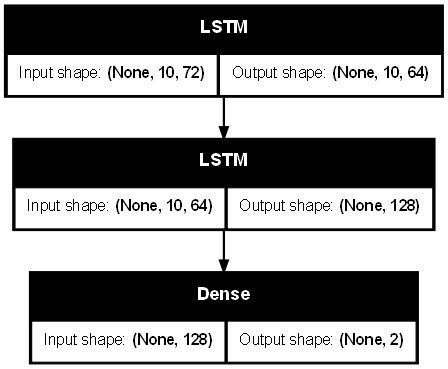

The PFE Model Classification Metrics for test set:
Accuracy: 0.4947839046199702
Precision: 0.5150359185566399
Recall: 0.4947839046199702
F-Score: 0.4662972270071861
--------------------------------------------------------------


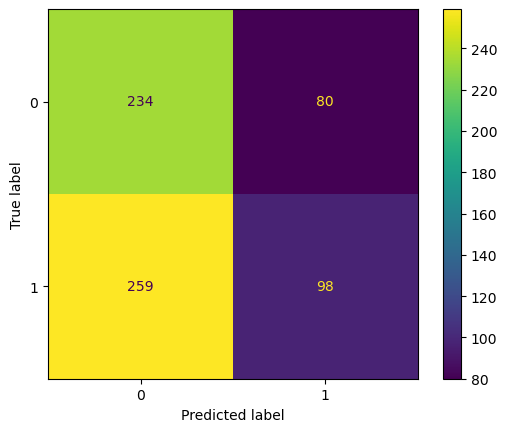

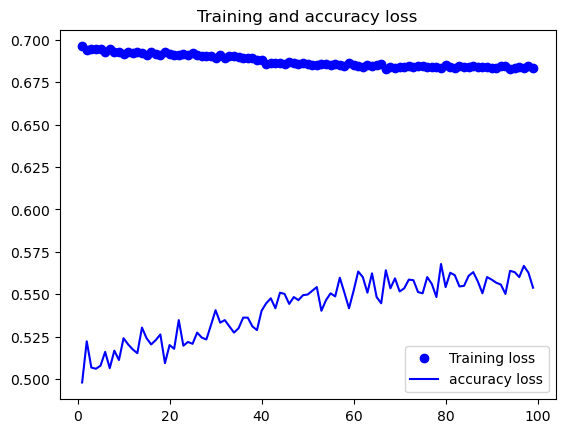

Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_72 (LSTM)                       │ (None, 10, 128)             │         102,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_73 (LSTM)                       │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 704,264 (2.69 MB)

 Trainable params: 234,754 (917.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 469,510 (1.79 MB)

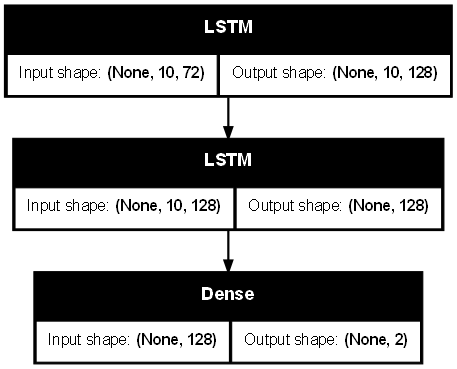

The ROP Model Classification Metrics for test set:
Accuracy: 0.524300441826215
Precision: 0.5244475638592827
Recall: 0.524300441826215
F-Score: 0.5242818693644665
--------------------------------------------------------------


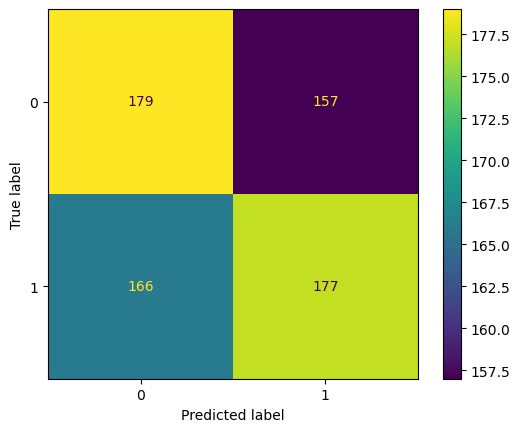

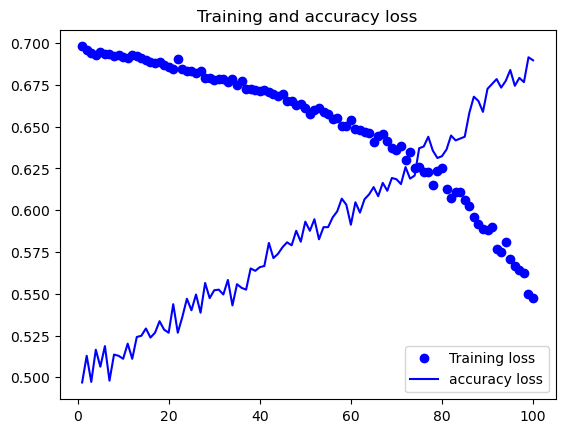

Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_74 (LSTM)                       │ (None, 10, 128)             │         102,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_75 (LSTM)                       │ (None, 10, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_76 (LSTM)                       │ (None, 10, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_77 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 902,024 (3.44 MB)

 Trainable params: 300,674 (1.15 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 601,350 (2.29 MB)

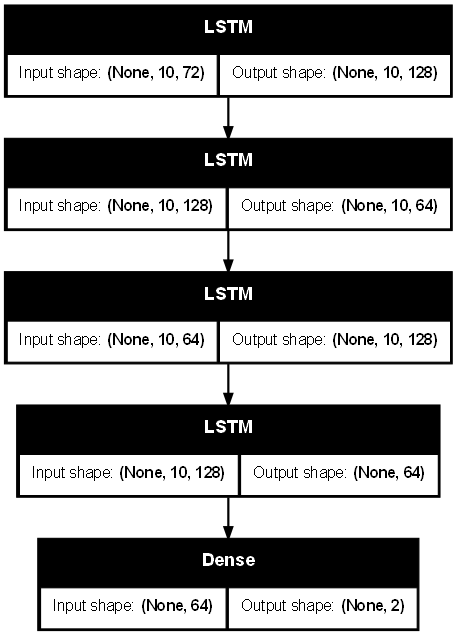

The XYL Model Classification Metrics for test set:
Accuracy: 0.5310650887573964
Precision: 0.28203012849690134
Recall: 0.5310650887573964
F-Score: 0.3684103707515079
--------------------------------------------------------------


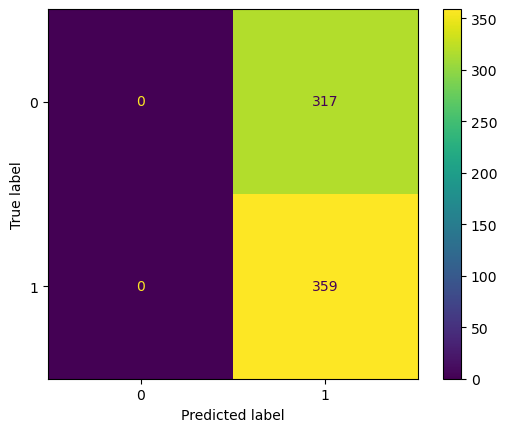

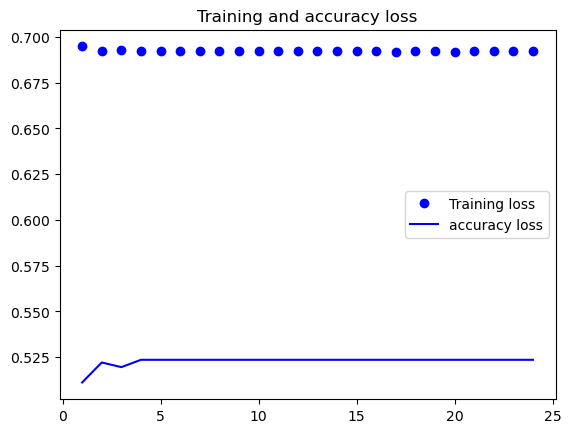

Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_78 (LSTM)                       │ (None, 10, 128)             │         102,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_79 (LSTM)                       │ (None, 10, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_80 (LSTM)                       │ (None, 10, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_81 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 902,024 (3.44 MB)

 Trainable params: 300,674 (1.15 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 601,350 (2.29 MB)

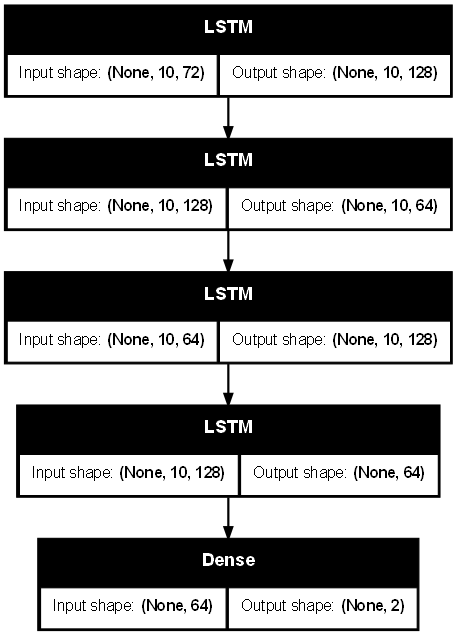

The CPAY Model Classification Metrics for test set:
Accuracy: 0.391304347826087
Precision: 0.45684143222506396
Recall: 0.391304347826087
F-Score: 0.2324623489968602
--------------------------------------------------------------


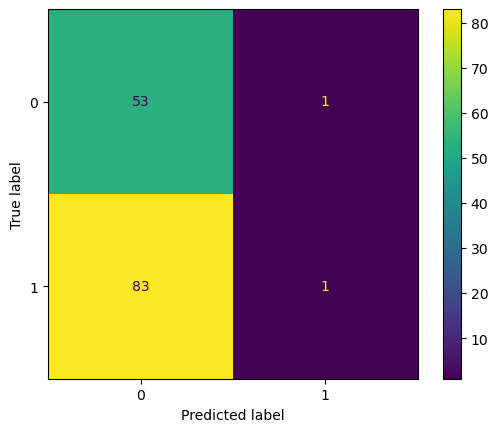

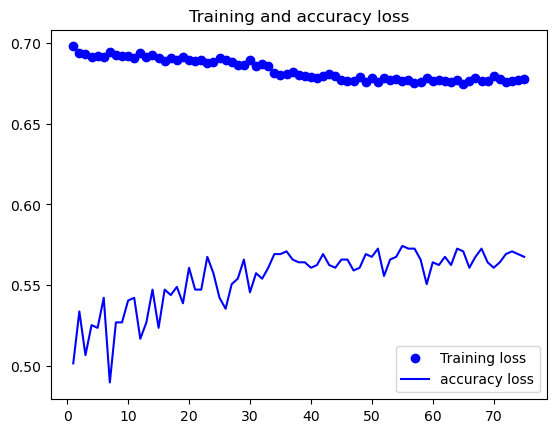

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_82 (LSTM)                       │ (None, 10, 128)             │         102,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_83 (LSTM)                       │ (None, 10, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_84 (LSTM)                       │ (None, 10, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_85 (LSTM)                       │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 655,496 (2.50 MB)

 Trainable params: 218,498 (853.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 436,998 (1.67 MB)

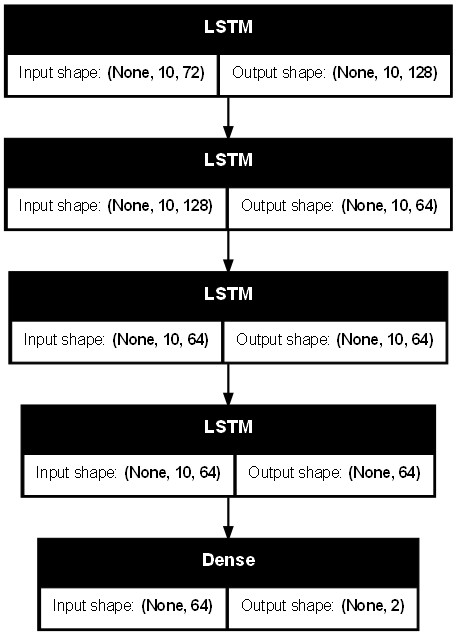

The INCY Model Classification Metrics for test set:
Accuracy: 0.4798807749627422
Precision: 0.48973313714422023
Recall: 0.4798807749627422
F-Score: 0.35762539139172556
--------------------------------------------------------------


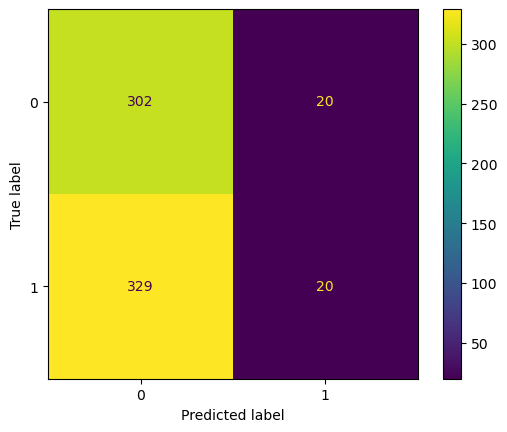

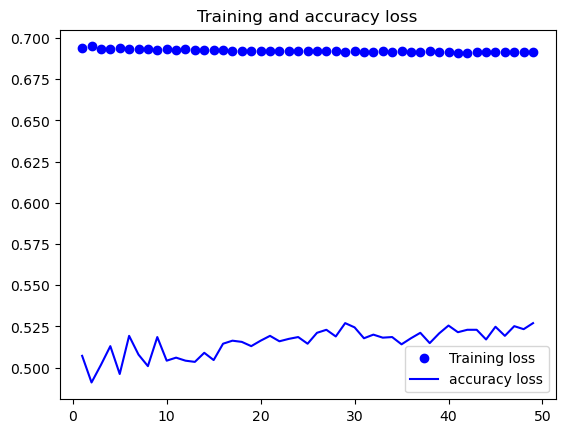

Average Classification Metrics for All Models on test set:
Average Accuracy: 0.4842669115984822
Average Precision: 0.4536176360564216
Average Recall: 0.4842669115984822
Average F-Score: 0.38981544150234926


In [27]:
# evaluate the models in the archive
evaluate_models_archive(lstm_hp_models_archive_1h)